In [2]:
#importing the necessary modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#reading the data file as dataframe
data = pd.read_csv("C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Bridging Imaging Users to Imaging Analysis - 2022 (Responses) - Form Responses 1_copy.csv")

In [4]:
#Creating a dictionary to rename
dict_rename = {
    'Which of the following roles best describes you?':'Role', 
    'Which of the following do you have significant formal training in or experience with? Select all that apply.':'Training', 
    'Where do you currently primarily work?':'Location', 
    'How would you describe your work?':'Work description', 
    'How would you rate your computational skills?':'Level of computational skills', 
    'How would you rate your comfort in developing new computational skills?':'Comfort in developing computational skills', 
    'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.':'Approach to solutions', 
    'How frequently do you use scripting to solve image analysis problems?':'Frequency of script usage', 
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Scholarly "best practices" article]':'Preferable instructional methods articles',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Written step-by-step tutorial]':'Preferable instructional methods written tutorials',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Video tutorial]':'Preferable instructional methods Video tutorial',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Interactive webinar]':'Preferable instructional methods Interactive webinar',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [One-on-one "office hours" with an expert]':'Preferable instructional methods Office hours',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [In person seminar/tutorial lasting <1 day]':'Preferable instructional methods Seminar 1day',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Multiday workshop]':'Preferable instructional methods Multiday workshop',
    'How interested are you in learning more about the following topics? [Image analysis theory]':'Interes in topics Image analysis theory',
    'How interested are you in learning more about the following topics? [General image analysis practices]':'Interest in topics Image analysis practices',
    'How interested are you in learning more about the following topics? [Image analysis practices related to my (sub) discipline]':'Interest in topics related to sub discipline',
    'How interested are you in learning more about the following topics? [Learning to use a particular software tool]':'Interest in topics Specific software tool',
    'How interested are you in learning more about the following topics? [Deep learning as applied to image analysis]':'Interest in topics Deep learning for image analysis',
    'How interested are you in learning more about the following topics? [Analyzing large images/large numbers of images]':'Interest in topics Analyzing large images',
    'How interested are you in learning more about the following topics? [Visualizing image analysis results]':'Interest in topics Visualization of results',
    'The next question will ask you about particular image analysis tools and techniques. Do you want to answer questions about microscopy in the field/area of life sciences or physical sciences?':'Microscopy for life sciences physical sciences',
    'What image analysis tools have you used before? (check all that apply)':'usage of image analysis tools',
    'What image analysis tools do you use the most?':'Most used image analysis tools',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Brightfield/DIC/phase-contrast of cells or organisms from manually selected fields]':'Types of images analyzed Brightfield/DIC/phase-contrast manually acquired',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Brightfield/DIC/phase-contrast of cells or organisms from an automated microscope (such as a high content imager)]':'Types of images analyzed Brightfield/DIC/phase-contrast automated',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Fluorescent images of cells/organisms from manually selected fields]':'Types of images analyzed-Fluorescent images manually acquired',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Fluorescent images of cells/organisms from an automated microscope (such as a high content imager)]':'Types of images analyzed automated',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Histologically stained tissue sections]':'Types of images analyzed-Histological tissue sections',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Electron microscopy]':'Types of images analyzed-Electro microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Imaging mass spectrometry]':'Types of images analyzed-Imaging mass spectrometry',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Imaging flow cytometry]':'Types of images analyzed-Imaging flow cytometry',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Superresolution (PALM/STORM)]':'Types of images analyzed-Superresolution (PALM/STORM)',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Autofluorescence imaging (ie FLIM)]':'Types of images analyzed-Autofluorescence imaging (ie FLIM)',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Other]':'Types of images analyzed-Other',
    'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you think are generally well-solved?':'Well solved image analysis problems',
    'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you wish had easier/better solutions?':'Image analysis problems which needs better solutions',
    'What image analysis tools have you used before? (check all that apply)':'Commonly used image analysis tools',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Optical microscopy/DIC/fractography]':'Types of images analyzed-Optical microscopy/DIC/fractography',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Scanning electron microscopy (secondary electron or back scattered imaging)]':'Types of images analyzed-Scanning electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Transmission electron microscopy (including electron diffraction and STEM imaging, e.g. HAADF-STEM)]':'Types of images analyzed-Transmission electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Spectroscopy/diffractive imaging in the SEM/TEM (eg. EDS, EBSD, EELS, CL)]':'Types of images analyzed-Spectroscopy/diffractive imaging in the SEM/TEM',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Imaging with mass spectrometry (eg SIMS/APT)]':'Types of images analyzed-Imaging with mass spectrometry',
    'What kinds of images do you commonly want to analyze (select all that apply)? [X-ray microscopy (including tomography)]':'Types of images analyzed-X-ray microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [FM imaging, force spectroscopy, single molecule force spectroscopy]':'Types of images analyzed-FM imaging force spectroscopy single molecule force spectroscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Fluorescence microscopy]':'Types of images analyzed-Fluorescence microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Other]':'Types of images analyzed Other',
    'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you think are generally well-solved?':'Well solved image analysis problems-physical sciences',
    'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you wish had easier/better solutions?':'Image analysis problems which needs better solutions physical sciences',
    'Where did you hear about this survey? Please select all that apply.':'hear about this survey',
    'Please select any of the following you have attended in the past':'Previous experience',
    'Are there any image analysis workshops, tutorials, or conferences you are aware of and attended or considered attending? If so, how many?':'Number of conferences/workshops attended',
    'How would you most prefer to be notified about image analysis workshops, sessions, or conferences being planned?':'Notification of image analysis workshop',
    'Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful?  If yes, what made them beneficial?':'Experience with previous workshops/conferences',
    'Are there any conferences you\'ve attended in the past that you think would particularly benefit from the addition/expansion of image analysis offerings?':'Recommended conferences/workshops',
    'What specific topics (i.e. overviews of a particular tool, comparisons between pieces of software, or how to use a certain tool for a certain kind of experiment) would you like to see prioritized for future image analysis workshop and tutorial offerings?':'Topics of interest',
    'What do you think analysis tool CREATORS (such as software developers) could/should do to make image analysis better and more successful? How best could we encourage them to do it?':'Creators role',
    'What do you think analysis tool USERS (such as microscopists) could/should do to make image analysis better and more successful?  How best could we encourage them to do it?':'Users role',
    'Any other thoughts?':'Other thoughts',
    'Would you be interested in subscribing to a mailing list (announcing workshops, new tools, collaboration opportunities, etc) for EITHER the Center for Open Bioimage Analysis OR Bioimaging North America OR the Royal Microscopical society? If yes, you will be taken to a page to subscribe, if not this form will submit.':'Subscription'
    }

 'What image analysis tools do you use the most?':'Most used image analysis tools_physical sciences', deleted this because the question was the same for both Life and Physical sciences hence could not the renaming was not proper. 

In [5]:
#renaming the columbs of the dictionary
data.rename(columns=dict_rename, inplace=True)

In [6]:
# pie chart for the roles of the survey participants 
role_pie_chart = px.pie(data, values=data.Role.value_counts(), names=data.Role.value_counts().index, title="Roles", width=700, height=400)
role_pie_chart.update_traces(insidetextorientation = 'radial')
role_pie_chart.update_layout(title_x=0.5,title_y = 0.8, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))


In [7]:
#Geo chart for the location of the participants; locations were given based on a country that is centrally located in a continent
demographics = data["Location"]
demographics_chart = px.scatter_geo(demographics, locations=['AUT', 'USA', 'KGZ', 'BRA', 'AUS','TCD'], size= data.Location.value_counts(), projection="natural earth", color = data.Location.value_counts().index, title="Location", labels={'color':'Continent'}, width=600, height=400)
demographics_chart.update_layout(title_x=0.45,title_y=0.80, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [8]:
#creating a subset of the dataframe
counts_tools = data["Most used image analysis tools"].dropna(how='all')
counts_tools = pd.DataFrame(counts_tools)

#using the following instead of teh value counts since the legends couldn't be shortened 
counts_tools['Commercial software that comes with my microscope'] = counts_tools['Most used image analysis tools'].apply(lambda x:True if x == 'Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)' else False)
counts_tools['Other commercial software'] = counts_tools['Most used image analysis tools'].apply(lambda x: True if x == 'Other commercial software (Imaris, Volocity, etc)' else False)
counts_tools['Open source point-and-click software'] = counts_tools['Most used image analysis tools'].apply(lambda x: True if x == 'Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)'else False)
counts_tools['Computational libraries and scripts'] = counts_tools['Most used image analysis tools'].apply(lambda x:True if x == 'Computational libraries and scripts (python (scikit-image), MATLAB, etc)' else False)
counts_tools['None'] = counts_tools['Most used image analysis tools'].apply(lambda x:True if x == 'None' else False)
counts_tools_subset = counts_tools.iloc[:, 1:6]
counts_tools_df = pd.DataFrame(counts_tools_subset.sum())
counts_tools_df = counts_tools_df.reset_index()
counts_tools_df = counts_tools_df.rename(columns={'index':'tools', 0:'counts'})
counts_tools_df

# Bar chart for the mostly used image analysis tools
counts_tools_bar = px.bar(counts_tools_df, y=counts_tools_df['tools'], x=counts_tools_df['counts'],labels ={'tools':''}, orientation ='h', width=650, height=400, text_auto=True)
counts_tools_bar.update_layout(font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
counts_tools_bar.update_yaxes(categoryorder='total ascending')
counts_tools_bar.update_layout(title='Most used image analysis tools', title_x=0.5,title_y = 0.95)

In [9]:
# how users would like to ne notfied for future workshops
counts_notifications =  data['Notification of image analysis workshop'].dropna(how='all')
counts_notifications = pd.DataFrame(counts_notifications)
counts_notifications['notify'] = counts_notifications['Notification of image analysis workshop'].apply(lambda x:'Other' if x not in ['Word of mouth', 'My local microscopy facility', 'Postings on image.sc forum or microforum', 'A discipline-specific society or network', 'Twitter', 'Email list'] else x)
counts_notifications['notify'].value_counts()

#Graph for notifications 
notify_bar = px.bar(y=counts_notifications['notify'].value_counts().index, x=counts_notifications['notify'].value_counts().values, labels={'x':'Counts', 'y':''}, orientation='h', width=600, height=400, text_auto=True)
notify_bar.update_layout(title= 'Notifications of future workshops',title_x=0.5,title_y = 0.95, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
notify_bar.update_yaxes(categoryorder = 'total ascending')

In [10]:
#Script usage for image analysis 
frequency =  data["Frequency of script usage"].value_counts()
frequency = px.bar(data, x=frequency.index, y=frequency.values, labels={'x':'', 'y':'Counts'}, width=400, height=400,color_continuous_scale='Fall', text_auto= True, title="Frequency of script usage <br> for image analysis")
frequency.update_layout(title_x=0.5, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
frequency.update_xaxes(categoryorder ="array", categoryarray = ['Often','Most of the time','Sometimes','Never'])

In [11]:
#Conferences attended
df = data["Number of conferences/workshops attended"]
conferences = df.value_counts()
conferences_attended = px.bar(df, x=conferences.index, y=conferences.values, color_continuous_scale='Fall', text_auto=True, labels = {'x':'','y':'Number of participants'}, width=400, height=400)
conferences_attended.update_layout(title_x=0.5)
conferences_attended.update_xaxes(categoryorder = 'array', categoryarray = ['Many','Some','Few','None'])
conferences_attended.update_layout(title='Conferences attended by  <br>  the survey participants', title_x = 0.565, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [12]:
# The domains in which the participants work with respect to the roles
data["Training"] = data["Training"].astype(str) # this was done to avoid the NaN rows for further analysis 

In [13]:
# Based on the values in a particular query column('Training'), a new column was created with boolean values based on the presence of the keyterms in the query column;,done using lambda fucntion
data['Cell/Molecular Biology'] = data['Training'].apply(lambda x: True if 'Cell/Molecular Biology' in x else False)
data['Physics/Biophysics'] = data["Training"].apply(lambda x: True if 'Physics/Biophysics'in x else False)
data['Chemistry/Biochemistry'] = data["Training"].apply(lambda x: True if 'Chemistry/Biochemistry'in x else False)
data['Statistics/Biostatistics'] =data['Training'].apply(lambda x: True if 'Statistics/Biostatistics' in x else False)
data['Medicine'] = data['Training'].apply(lambda x: True if 'Medicine' in x else False)
data['Computer science'] = data['Training'].apply(lambda x: True if 'Computer science' in x else False)
data['Computer vision'] = data['Training'].apply(lambda x: True if 'Computer vision' in x else False)
data['Deep learning'] = data['Training'].apply(lambda x: True if 'Deep learning' in x else False)
data['Developmental Biology'] = data['Training'].apply(lambda x: True if 'Developmental Biology' in x else False)

In [14]:
#slicing the columns of interest and performing counts to get the respective counts
df_Cell_Molecular_Biology = data.loc[:, ["Role","Cell/Molecular Biology"]]
Cell_Molecular_Biology = df_Cell_Molecular_Biology.groupby("Role").sum().reset_index()

df_Physics_Biophysics = data.loc[:, ["Role", "Physics/Biophysics"]]
Physics_Biophysics = df_Physics_Biophysics.groupby("Role").sum().reset_index()

df_Chemistry_Biochemistry =data.loc[:, ["Role", "Chemistry/Biochemistry"]]
Chemistry_Biochemistry = df_Chemistry_Biochemistry.groupby("Role").sum().reset_index()

df_Statistics_Biostatistics = data.loc[:, ["Role","Statistics/Biostatistics"]]
Statistics_Biostatistics = df_Statistics_Biostatistics.groupby("Role").sum().reset_index()

df_Medicine = data.loc[:, ["Role", "Medicine"]]
Medicine = df_Medicine.groupby("Role").sum().reset_index()

df_Computer_science = data.loc[:,["Role", "Computer science"]]
Computer_science = df_Computer_science.groupby("Role").sum().reset_index()

df_Computer_vision = data.loc[:, ["Role", "Computer vision"]]
Computer_vision = df_Computer_vision.groupby("Role").sum().reset_index()

df_Deep_learning = data.loc[:, ["Role", "Deep learning"]]
Deep_learning = df_Deep_learning.groupby("Role").sum().reset_index()

df_Developmental_Biology = data.loc[:, ["Role", "Developmental Biology"]]
Developmental_Biology = df_Developmental_Biology.groupby("Role").sum().reset_index()


In [15]:
#concatenating the dataframes with respect to roles and domains
df_role_domain = pd.concat([Cell_Molecular_Biology, Physics_Biophysics, Chemistry_Biochemistry, Statistics_Biostatistics, Medicine, Computer_science, Computer_vision, Deep_learning, Developmental_Biology], axis=1)

#since the roles column was repetitive, the duplicate 'role' columns were removed
df_role_domain = df_role_domain.T.drop_duplicates().T

role=df_role_domain["Role"]


In [16]:
# Stacked bar chart - role with domains on what the participants are working
x=role

fig = go.Figure(go.Bar(name='Developmental Biology', y=role, x=df_role_domain["Developmental Biology"], orientation='h', insidetextanchor='end', text=df_role_domain["Developmental Biology"]))
fig.add_trace(go.Bar(name='Deep learning', y=role, x=df_role_domain["Deep learning"], orientation='h', text=df_role_domain["Deep learning"]))
fig.add_trace(go.Bar(name='Computer vision', y=role, x=df_role_domain["Computer vision"],  orientation='h', text = df_role_domain["Computer vision"]))
fig.add_trace(go.Bar(name="Computer science", y=role, x=df_role_domain["Computer science"],  orientation='h', text=df_role_domain["Computer science"]))
fig.add_trace(go.Bar(name="Medicine", y=role, x=df_role_domain["Medicine"],  orientation='h', text =df_role_domain["Medicine"]))
fig.add_trace(go.Bar(name="Statistics/Biostatistics", y=role, x=df_role_domain["Statistics/Biostatistics"],  orientation='h', text =df_role_domain["Statistics/Biostatistics"]))
fig.add_trace(go.Bar(name="Chemistry/Biochemistry", y=role, x=df_role_domain["Chemistry/Biochemistry"],  orientation='h', text=df_role_domain["Chemistry/Biochemistry"]))
fig.add_trace(go.Bar(name="Physics/Biophysics", y=role, x=df_role_domain["Physics/Biophysics"],  orientation='h', text=df_role_domain["Physics/Biophysics"]))
fig.add_trace(go.Bar(name="Cell/Molecular Biology", y=role, x=df_role_domain["Cell/Molecular Biology"],  orientation='h', text=df_role_domain["Cell/Molecular Biology"]))

fig.update_layout(barmode='stack', title='Role Based Training & Experience', title_x=0.5, title_y=0.9, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
fig.update_yaxes(categoryorder = 'total ascending')
fig.show()

In [17]:
#Work description - creating new columns based on the values provided by the participants in the work description
data["Imaging"] = data.eval("`Work description` < 3")
data["Balanced"] = data.eval("`Work description` in [3,4,5]")
data["Analyst"] = data.eval("`Work description` > 5")
Work_type = [sum(data["Imaging"]), sum(data["Balanced"]), sum(data["Analyst"])]
Work_type

# creating a column for work type
data.loc[data["Work description"] < 3, "Work type" ] = "Imaging"
data.loc[(data["Work description"] >= 3) & (data["Work description"] < 5), "Work type"] = "Balanced"
data.loc[data["Work description"] >= 5, "Work type"] = "Analyst"
work_type_counts = data["Work type"].value_counts()
work_type_counts 

# creating a column for knowledge in computational skills 
data.loc[data["Level of computational skills"] < 3, "Knowledge of computational skills"] = "Low skill"
data.loc[(data["Level of computational skills"] >= 3) & (data["Level of computational skills"] < 5), "Knowledge of computational skills"] = "Medium skill"
data.loc[data["Level of computational skills"] >= 5, "Knowledge of computational skills"] = "High skill"
computational_knowledge = data["Knowledge of computational skills"].value_counts()
computational_knowledge

High skill      244
Medium skill    183
Low skill        66
Name: Knowledge of computational skills, dtype: int64

In [18]:
#Work description graph 
work_cat = data['Work description'].value_counts().to_frame().reset_index()
work_cat['Percentage'] = (work_cat['Work description']/work_cat['Work description'].sum())*100
work_cat['Percentage'] = work_cat['Percentage'].round(decimals=1)
work_cat

index  Work description  Percentage
0    4.0               185        37.5
1    3.0                88        17.8
2    2.0                63        12.8
3    5.0                49         9.9
4    6.0                45         9.1
5    7.0                45         9.1
6    1.0                18         3.7

In [19]:
work_cat_bar = px.bar(work_cat, x=work_cat['index'], y=work_cat['Work description'], labels={'index':'', 'Work description':'Counts'},text=[str(i)+'%' for i in work_cat['Percentage']] ,text_auto=True)
work_cat_bar.update_layout(width=700, height=500)
work_cat_bar.update_layout(title='Work description', title_x=0.5, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [20]:
# Creating a dataframe for work type and level of computational skills 
work_comp_1 = data["Work type"]
work_comp_2 = data["Knowledge of computational skills"]
work_comp = pd.concat([work_comp_1, work_comp_2], axis=1)

work_comp_grouped = work_comp.groupby("Work type").value_counts().reset_index()
work_comp_grouped = work_comp_grouped.rename(columns={0:'Counts'})
work_comp_grouped

work_comp_sunburst = px.sunburst(work_comp_grouped, path=["Work type", 'Knowledge of computational skills'], values='Counts', width=500, height=500)
work_comp_sunburst.update_traces(textinfo="label+percent parent")
work_comp_sunburst.update_layout(title="Work type and their computational skills", title_x=0.5, font=dict(family='Helvetica', color="Black", size=16))

In [21]:
# Comfort in developing new computational skills
data.loc[data["Comfort in developing computational skills"] < 3, 'Comfort'] = 'Low comfort'
data.loc[(data['Comfort in developing computational skills'] >= 3) & (data['Comfort in developing computational skills'] < 5), 'Comfort'] = "Medium comfort"
data.loc[data['Comfort in developing computational skills'] >= 5 , 'Comfort'] = "High comfort"

In [22]:
comfort_newskills = data["Comfort"].value_counts()
comfort_newskills

High comfort      291
Medium comfort    134
Low comfort        68
Name: Comfort, dtype: int64

In [23]:
#Subset of the dataframe to compare the comfort in developing new computational skills and their computational knowledge
comf_comp_1 = data["Comfort"]
comf_comp_2 = data["Knowledge of computational skills"]
comf_comp_comb = pd.concat([comf_comp_1, comf_comp_2], axis=1)

In [24]:
comf_comp_comb = comf_comp_comb.groupby("Comfort").value_counts().reset_index()
comf_comp_comb = comf_comp_comb.rename(columns={0:'Counts'})
comf_comp_comb

Comfort Knowledge of computational skills  Counts
0    High comfort                        High skill     213
1    High comfort                      Medium skill      67
2    High comfort                         Low skill      11
3     Low comfort                      Medium skill      33
4     Low comfort                         Low skill      29
5     Low comfort                        High skill       6
6  Medium comfort                      Medium skill      83
7  Medium comfort                         Low skill      26
8  Medium comfort                        High skill      25

In [25]:
# sunburst charts for comfort in developing new computational skills and with level of computational skills 

comf_comp_sunburst = px.sunburst(comf_comp_comb, path=["Comfort", 'Knowledge of computational skills'], values='Counts', width=500, height=500)
comf_comp_sunburst.update_traces(textinfo="label+percent parent")
comf_comp_sunburst.update_layout(title="Comfort in developing new computational skills <br> based on their knowledge in computational skills", title_x=0.5, font=dict(family='Helvetica', color="Black", size=16))



In [26]:
data["Approach to solutions"] = data["Approach to solutions"].astype(str)

In [27]:
# Ways people analyze data 

data['Play with a tool'] = data['Approach to solutions'].apply(lambda x: True if 'Sit down with a tool I know and start playing with the data' in x else False)
data["Ask a friend or colleague"] = data["Approach to solutions"].apply(lambda x: True if 'Ask a friend or colleague to help me'in x else False)
data["Ask on image sc forum"] = data["Approach to solutions"].apply(lambda x: True if 'Ask on forum.image.sc'in x else False)
data['Google'] = data["Approach to solutions"].apply(lambda x: True if 'Google' in x else False)
data["Particluar websites"] = data["Approach to solutions"].apply(lambda x:True if "particular website" in x else False)
data["Scientific literature"] = data["Approach to solutions"].apply(lambda x: True if 'scientific literature' in x else False)

In [28]:
ways_people_analyze_data = data.columns
ways_people_analyze_data_subset = ways_people_analyze_data[-6:]
ways_people_analyze_data_values= [data["Play with a tool"].sum(), data["Ask a friend or colleague"].sum(), data["Ask on image sc forum"].sum(), data["Google"].sum(), data["Particluar websites"].sum(), data["Scientific literature"].sum()]

In [29]:
ways_people_analyze_data_bar = px.bar(x=ways_people_analyze_data_subset, y =ways_people_analyze_data_values,text_auto=True, labels={'x':'', 'y':'Number of users'}, width =500, height=500)
ways_people_analyze_data_bar.update_layout(title ='Approach to solutions <br> for image analysis problems', title_x = 0.5, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
ways_people_analyze_data_bar.update_xaxes(categoryorder = 'total descending')

In [30]:
ways_people_analyze_data_subset

Index(['Play with a tool', 'Ask a friend or colleague',
       'Ask on image sc forum', 'Google', 'Particluar websites',
       'Scientific literature'],
      dtype='object')

In [185]:
#Preferable instructional methods 
Pre_mtd = go.Figure(go.Bar(name='Best practices articles', x=data["Preferable instructional methods articles"].value_counts().values, y=data["Preferable instructional methods articles"].value_counts().index, orientation='h', text=data["Preferable instructional methods articles"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Written tutorial', x=data["Preferable instructional methods written tutorials"].value_counts().values, y=data["Preferable instructional methods written tutorials"].value_counts().index, orientation='h', text=data["Preferable instructional methods written tutorials"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Video tutorial', x=data["Preferable instructional methods Video tutorial"].value_counts().values, y=data["Preferable instructional methods Video tutorial"].value_counts().index, orientation='h', text=data["Preferable instructional methods Video tutorial"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Interactive webinar', x=data["Preferable instructional methods Interactive webinar"].value_counts().values, y=data["Preferable instructional methods Interactive webinar"].value_counts().index, orientation='h', text=data["Preferable instructional methods Interactive webinar"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Office hours',x=data["Preferable instructional methods Office hours"].value_counts().values, y=data["Preferable instructional methods Office hours"].value_counts().index, orientation='h', text=data["Preferable instructional methods Office hours"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='One day seminar',x=data["Preferable instructional methods Seminar 1day"].value_counts().values, y=data["Preferable instructional methods Seminar 1day"].value_counts().index, orientation='h', text=data["Preferable instructional methods Seminar 1day"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Multiday workshop',x=data["Preferable instructional methods Multiday workshop"].value_counts().values, y=data["Preferable instructional methods Multiday workshop"].value_counts().index, orientation='h', text=data["Preferable instructional methods Multiday workshop"].value_counts().values))

Pre_mtd.update_layout(title="Preferable instructional methods", title_x=0.5)
Pre_mtd.update_yaxes(categoryorder ='array', categoryarray = ['Not at all preferable', 'Somewhat preferable','Moderately preferable','Very preferable' ])
Pre_mtd.update_layout(barmode = 'stack')

In [191]:
#Creating dataframes for preferable instructional methods vs comp skills 
def mtds(i):
    df= data.iloc[:,[i]]
    df = df.value_counts().to_frame().reset_index()
    columnnames = list(df.columns)
    df_name = columnnames[0]
    namelist = df_name.split()
    dfname  = str(namelist[-1])
    return df
    

In [221]:
df_art = mtds(10)
df_art = df_art.rename(columns={0:'articles'})
df_art = df_art.sort_values(by='Preferable instructional methods articles', ascending=True)

df_wrt = mtds(11)
df_wrt = df_wrt.rename(columns={0:'written'})
df_wrt = df_wrt.sort_values(by='Preferable instructional methods written tutorials', ascending=True)

df_vid = mtds(12)
df_vid = df_vid.rename(columns={0:'video'})
df_vid = df_vid.sort_values(by='Preferable instructional methods Video tutorial', ascending=True)

df_web = mtds(13)
df_web = df_web.rename(columns={0:'webinar'})
df_web = df_web.sort_values(by='Preferable instructional methods Interactive webinar', ascending=True)

df_off = mtds(14)
df_off = df_off.rename(columns={0:'office hours'})
df_off = df_off.sort_values(by='Preferable instructional methods Office hours', ascending=True)

df_one = mtds(15)
df_one = df_one.rename(columns={0:'one day'})
df_one = df_one.sort_values(by='Preferable instructional methods Seminar 1day', ascending=True)

df_mul = mtds(16)
df_mul = df_mul.rename(columns={0:'multi day'})
df_mul = df_mul.sort_values(by='Preferable instructional methods Multiday workshop', ascending=True)

In [222]:
combined = pd.concat([df_art, df_wrt, df_vid, df_web, df_off, df_one, df_mul], axis=1)

In [223]:
combined

Preferable instructional methods articles  articles  \
1                     Moderately preferable       165   
3                     Not at all preferable        49   
0                       Somewhat preferable       190   
2                           Very preferable        89   

  Preferable instructional methods written tutorials  written  \
1                              Moderately preferable      147   
3                              Not at all preferable        3   
0                                    Very preferable      290   
2                                Somewhat preferable       53   

  Preferable instructional methods Video tutorial  video  \
1                           Moderately preferable    136   
3                           Not at all preferable     32   
0                                 Very preferable    229   
2                             Somewhat preferable     96   

  Preferable instructional methods Interactive webinar  webinar  \
1                                Somewhat preferable        166   
3                              Not at all preferable         53   
0                              Moderately preferable        172   
2                                    Very preferable        102   

  Preferable instructional methods Office hours  office hours  \
1                           Somewhat preferable           125   
3                         Not at all preferable            55   
0                               Very preferable           192   
2                         Moderately preferable           121   

  Preferable instructional methods Seminar 1day  one day  \
1                           Somewhat preferable      148   
3                         Not at all preferable       61   
0                         Moderately preferable      169   
2                               Very preferable      115   

  Preferable instructional methods Multiday workshop  multi day  
1                              Moderately preferable        137  
3                              Not at all preferable         84  
0                                Somewhat preferable        183  
2                                    Very preferable         89

In [233]:
df_art

Preferable instructional methods articles  articles
1                     Moderately preferable       165
3                     Not at all preferable        49
0                       Somewhat preferable       190
2                           Very preferable        89

In [ ]:
mtds = go.Figure()

mtds.add_trace(name='Very preferable', x=df_art)

In [37]:
#comparing the instructional methods with the computational skills 
mtds_skills_data = data.iloc[:, 10:17]
mtds_skills_data = pd.concat([mtds_skills_data, data["Knowledge of computational skills"]], axis=1)
mtds_skills_data.columns

Index(['Preferable instructional methods articles',
       'Preferable instructional methods written tutorials',
       'Preferable instructional methods Video tutorial',
       'Preferable instructional methods Interactive webinar',
       'Preferable instructional methods Office hours',
       'Preferable instructional methods Seminar 1day',
       'Preferable instructional methods Multiday workshop',
       'Knowledge of computational skills'],
      dtype='object')

In [38]:
mtds_skills_data_1=mtds_skills_data.iloc[:,1].value_counts()

In [39]:
mtds_skills_data_1

Very preferable          290
Moderately preferable    147
Somewhat preferable       53
Not at all preferable      3
Name: Preferable instructional methods written tutorials, dtype: int64

In [40]:
#Interest in various topics

interest_df = data.iloc[:,17:24]

In [41]:
# Topics of interest for the tutorials 
trial_radar = data["Interes in topics Image analysis theory"].value_counts().to_frame()
trial_radar_1=data["Interest in topics Image analysis practices"].value_counts().to_frame()
trial_radar_2=data["Interest in topics related to sub discipline"].value_counts().to_frame()
trial_radar_3=data["Interest in topics Specific software tool"].value_counts().to_frame()
trial_radar_4=data["Interest in topics Deep learning for image analysis"].value_counts().to_frame()
trial_radar_5=data["Interest in topics Analyzing large images"].value_counts().to_frame()
trial_radar_6=data["Interest in topics Visualization of results"].value_counts().to_frame()

#concatenating all the related columns for topics of interest
trial = pd.concat([trial_radar, trial_radar_1, trial_radar_2, trial_radar_3, trial_radar_4, trial_radar_5, trial_radar_6], axis=1)

#Reseting the index so that the column can be renamed
trial =trial.reset_index()
trial = trial.rename(columns={'index':'interest'})


In [42]:
trial

interest  Interes in topics Image analysis theory  \
0        Very interested                                      157   
1  Moderately interested                                      150   
2    Somewhat interested                                      147   
3  Not at all interested                                       39   

   Interest in topics Image analysis practices  \
0                                          227   
1                                          188   
2                                           69   
3                                            9   

   Interest in topics related to sub discipline  \
0                                           341   
1                                           109   
2                                            36   
3                                             7   

   Interest in topics Specific software tool  \
0                                        223   
1                                        171   
2                                         82   
3                                         17   

   Interest in topics Deep learning for image analysis  \
0                                                207     
1                                                143     
2                                                114     
3                                                 29     

   Interest in topics Analyzing large images  \
0                                        277   
1                                        139   
2                                         70   
3                                          7   

   Interest in topics Visualization of results  
0                                          281  
1                                          154  
2                                           51  
3                                            7

In [43]:
trial_df = trial.set_index('interest').transpose()

In [44]:
trial_df

interest                                            Very interested  \
Interes in topics Image analysis theory                         157   
Interest in topics Image analysis practices                     227   
Interest in topics related to sub discipline                    341   
Interest in topics Specific software tool                       223   
Interest in topics Deep learning for image anal...              207   
Interest in topics Analyzing large images                       277   
Interest in topics Visualization of results                     281   

interest                                            Moderately interested  \
Interes in topics Image analysis theory                               150   
Interest in topics Image analysis practices                           188   
Interest in topics related to sub discipline                          109   
Interest in topics Specific software tool                             171   
Interest in topics Deep learning for image anal...                    143   
Interest in topics Analyzing large images                             139   
Interest in topics Visualization of results                           154   

interest                                            Somewhat interested  \
Interes in topics Image analysis theory                             147   
Interest in topics Image analysis practices                          69   
Interest in topics related to sub discipline                         36   
Interest in topics Specific software tool                            82   
Interest in topics Deep learning for image anal...                  114   
Interest in topics Analyzing large images                            70   
Interest in topics Visualization of results                          51   

interest                                            Not at all interested  
Interes in topics Image analysis theory                                39  
Interest in topics Image analysis practices                             9  
Interest in topics related to sub discipline                            7  
Interest in topics Specific software tool                              17  
Interest in topics Deep learning for image anal...                     29  
Interest in topics Analyzing large images                               7  
Interest in topics Visualization of results                             7

In [45]:
trial_df = trial_df.reset_index()

In [46]:
trial_df=trial_df.replace('Interes in topics Image analysis theory', 'Image analysis theory')
trial_df=trial_df.replace('Interes in topics Image analysis practices', 'Image analysis practices')
trial_df=trial_df.replace('Interest in topics related to sub discipline', 'Topics related to sub discipline')
trial_df=trial_df.replace('Interest in topics Specific software tool', 'Specific software tool')
trial_df=trial_df.replace('Interest in topics Deep learning for image analysis', 'Deep learning for image analysis')
trial_df=trial_df.replace('Interest in topics Analyzing large images', 'Analyzing large images')
trial_df=trial_df.replace('Interest in topics Visualization of results', 'Visualization of results')

In [47]:
int_fin = go.Figure()

int_fin.add_trace(go.Bar(name='Very interested', x=trial_df['index'], y=trial_df['Very interested'], marker_color='darkslateblue'))
int_fin.add_trace(go.Bar(name='Moderately interested', x=trial_df['index'], y=trial_df['Moderately interested'],marker_color='dodgerblue'))
int_fin.add_trace(go.Bar(name='Somewhat interested', x=trial_df['index'], y=trial_df['Somewhat interested'], marker_color='cornflowerblue'))
int_fin.add_trace(go.Bar(name='Not at all interested', x=trial_df['index'], y=trial_df['Not at all interested'], marker_color='skyblue'))

int_fin.update_layout(width=800, height=700)
int_fin.update_yaxes(title='Counts')
int_fin.update_yaxes(categoryorder='total descending')
int_fin.update_layout(title='How interested are you in learning more about the following topics?', title_x = 0.5, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [48]:
#Interested topics for tutorials
int_top = go.Figure(go.Bar(name='Image analysis theory', y=trial["Interes in topics Image analysis theory"], x=trial["interest"], orientation='v', text=trial["Interes in topics Image analysis theory"]))
int_top.add_trace(go.Bar(name='Image analysis practices', y=trial["Interest in topics Image analysis practices"], x=trial["interest"], orientation='v', text=trial["Interest in topics Image analysis practices"]))
int_top.add_trace(go.Bar(name='Topics related to sub discipline', y=trial["Interest in topics related to sub discipline"], x=trial["interest"], orientation='v', text=trial["Interest in topics related to sub discipline"]))
int_top.add_trace(go.Bar(name='Specific software tool', y=trial["Interest in topics Specific software tool"], x=trial["interest"], orientation='v', text=trial["Interest in topics Specific software tool"]))
int_top.add_trace(go.Bar(name='Deep learning for image analysis', y=trial["Interest in topics Deep learning for image analysis"], x=trial["interest"], orientation='v', text=trial["Interest in topics Deep learning for image analysis"]))
int_top.add_trace(go.Bar(name='Analyzing large images', y=trial["Interest in topics Analyzing large images"], x=trial["interest"], orientation='v', text=trial["Interest in topics Analyzing large images"]))
int_top.add_trace(go.Bar(name='Visualization of results', y=trial["Interest in topics Visualization of results"], x=trial["interest"], orientation='v', text=trial["Interest in topics Visualization of results"]))

int_top.update_layout(title="Topics of interest for the image analysis tutorials", title_x=0.5, width=900, height=500)
int_top.update_yaxes(categoryorder ='array', categoryarray = ['Not at all interested', 'Somewhat interested', 'Moderately interested','Very interested'])
int_top.update_layout(barmode = 'group')

In [49]:
# Comparing topics of interest for the tutorials with the knowledge of computational skills 

# creating the combined dataframe with interests and the knowledge of computational skills 

int_skills_df = pd.concat([interest_df, data["Knowledge of computational skills"]], axis=1)
int_skills_df.astype(str)

Interes in topics Image analysis theory  \
0                       Somewhat interested   
1                       Somewhat interested   
2                       Somewhat interested   
3                     Moderately interested   
4                           Very interested   
..                                      ...   
489                   Moderately interested   
490                         Very interested   
491                         Very interested   
492                   Moderately interested   
493                     Somewhat interested   

    Interest in topics Image analysis practices  \
0                         Moderately interested   
1                               Very interested   
2                           Somewhat interested   
3                               Very interested   
4                         Moderately interested   
..                                          ...   
489                             Very interested   
490                             Very interested   
491                             Very interested   
492                       Moderately interested   
493                       Moderately interested   

    Interest in topics related to sub discipline  \
0                                Very interested   
1                          Moderately interested   
2                          Moderately interested   
3                                Very interested   
4                          Moderately interested   
..                                           ...   
489                              Very interested   
490                              Very interested   
491                              Very interested   
492                              Very interested   
493                              Very interested   

    Interest in topics Specific software tool  \
0                             Very interested   
1                         Somewhat interested   
2                       Moderately interested   
3                             Very interested   
4                       Not at all interested   
..                                        ...   
489                     Moderately interested   
490                           Very interested   
491                       Somewhat interested   
492                           Very interested   
493                     Moderately interested   

    Interest in topics Deep learning for image analysis  \
0                                  Somewhat interested    
1                                      Very interested    
2                                Moderately interested    
3                                Moderately interested    
4                                Not at all interested    
..                                                 ...    
489                              Moderately interested    
490                                    Very interested    
491                                    Very interested    
492                                    Very interested    
493                                Somewhat interested    

    Interest in topics Analyzing large images  \
0                       Not at all interested   
1                       Moderately interested   
2                       Moderately interested   
3                         Somewhat interested   
4                       Moderately interested   
..                                        ...   
489                     Moderately interested   
490                           Very interested   
491                           Very interested   
492                           Very interested   
493                       Somewhat interested   

    Interest in topics Visualization of results  \
0                           Somewhat interested   
1                           Somewhat interested   
2                         Moderately interested   
3                         Moderately interested   
4                         Moderately interested   
..      

In [50]:
#creating the dataframes with specific interests and the knowledge of computational skills 
#group1 
image_analysis_theory = int_skills_df.iloc[:,[0,-1]].groupby("Interes in topics Image analysis theory").value_counts()
image_analysis_theory = image_analysis_theory.reset_index()
image_analysis_theory = image_analysis_theory.rename(columns={0:'counts'})

#group2
image_analysis_practices = int_skills_df.iloc[:,[1,-1]].groupby("Interest in topics Image analysis practices").value_counts()
image_analysis_practices = image_analysis_practices.reset_index()
image_analysis_practices = image_analysis_practices.rename(columns={0:'counts'})

#group3 
sub_disciplines = int_skills_df.iloc[:,[2,-1]].groupby("Interest in topics related to sub discipline").value_counts()
sub_disciplines = sub_disciplines.reset_index()
sub_disciplines = sub_disciplines.rename(columns={0:'counts'})

#group4
specific_tool = int_skills_df.iloc[:,[3,-1]].groupby("Interest in topics Specific software tool").value_counts()
specific_tool = specific_tool.reset_index()
specific_tool = specific_tool.rename(columns={0:'counts'})

#group5
deeplearning_analysis = int_skills_df.iloc[:,[4,-1]].groupby("Interest in topics Deep learning for image analysis").value_counts()
deeplearning_analysis = deeplearning_analysis.reset_index()
deeplearning_analysis = deeplearning_analysis.rename(columns={0:'counts'})

#group6 
large_images  = int_skills_df.iloc[:,[5,-1]].groupby("Interest in topics Analyzing large images").value_counts()
large_images = large_images.reset_index()
large_images = large_images.rename(columns={0:'counts'})

#group7 
visualization = int_skills_df.iloc[:,[6,-1]].groupby("Interest in topics Visualization of results").value_counts()
visualization = visualization.reset_index()
visualization = visualization.rename(columns={0:'counts'})



In [51]:
#stacked bar chart showing the topics of interest for the tutorials along with the level of computational skills of the participants
int_skills = go.Figure()

int_skills.add_trace(go.Bar(name ='Image analysis theory', x=image_analysis_theory["Interes in topics Image analysis theory"], y=image_analysis_theory["counts"], hovertext=image_analysis_theory["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Image analysis practices', x = image_analysis_practices["Interest in topics Image analysis practices"], y=image_analysis_practices["counts"], hovertext=image_analysis_theory["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Subdisciplines', x = sub_disciplines["Interest in topics related to sub discipline"], y=sub_disciplines["counts"], hovertext=sub_disciplines["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Specific tools', x = specific_tool["Interest in topics Specific software tool"], y=specific_tool["counts"], hovertext=specific_tool["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Deep learning', x = deeplearning_analysis["Interest in topics Deep learning for image analysis"], y=deeplearning_analysis["counts"], hovertext=deeplearning_analysis["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Analysing large images', x = large_images["Interest in topics Analyzing large images"], y=large_images["counts"], hovertext=large_images["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Visualization of results', x = visualization["Interest in topics Visualization of results"], y=visualization["counts"], hovertext=visualization["Knowledge of computational skills"]))


int_skills.update_layout(barmode='group', xaxis = {'categoryorder':'array', 'categoryarray':['Very interested','Moderately interested','Somewhat interested','Not at all interested']})
int_skills.update_layout(title="Topics of interest for the image analysis tutorials", title_x=0.5, width=900, height=500)


In [54]:
#What image analysis tools have you used before?

#Commonly used image analysis tools
data['Commonly used image analysis tools'] = data['Commonly used image analysis tools'].astype(str) # this is done to ignore the Nan for analysis 
data["Commercial software with the microscope"] = data['Commonly used image analysis tools'].apply(lambda x: True if 'Columbus' in x else False)
data["Other commercial software"] = data['Commonly used image analysis tools'].apply(lambda x: True if 'Imaris' in x else False)
data["Open source point-and-click software"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'FIJI' in x else False)
data["Computational libraries and scripts"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'MATLAB' in x else False)
data["Tools_none"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'None' in x else False)

# creating a subset of the dataframe 
com_tool_df =data.iloc[:, 85:90]
com_tool_df = com_tool_df.sum()
com_tool_df = com_tool_df.reset_index()
com_tool_df = com_tool_df.rename(columns={'index':'tools', 0:'counts'})
com_tool_df

tools  counts
0  Commercial software with the microscope     307
1                Other commercial software     251
2     Open source point-and-click software     451
3      Computational libraries and scripts     236
4                               Tools_none       1

In [55]:
#bar chart for the commonly used image analysis tools
com_tools_bar = px.bar(com_tool_df, y=com_tool_df['tools'], x=com_tool_df['counts'], labels={'tools':''}, text_auto=True, orientation='h')
                                              
com_tools_bar.update_layout(width=700, height=400, title="Commonly used image analysis tools", title_x=0.5, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
com_tools_bar.update_yaxes(categoryorder = 'total ascending')
                                            

In [56]:
#Kinds of images 
# slicing the necessary columns
type_of_images = data.iloc[:, 27:38]

type_of_images = type_of_images.astype(str)
BF_manual = type_of_images.iloc[:,0].to_frame()
BF_automated = type_of_images.iloc[:,1].to_frame()
fluorescent_manual = type_of_images.iloc[:,2].to_frame()
fluorescent_automated = type_of_images.iloc[:,3].to_frame()
histology = type_of_images.iloc[:,4].to_frame()
electron_microscopy = type_of_images.iloc[:,5].to_frame()
imaging_ms = type_of_images.iloc[:,6].to_frame()
imaging_fc = type_of_images.iloc[:,7].to_frame()
super_resolution = type_of_images.iloc[:,8].to_frame()
autofluorescence_imaging = type_of_images.iloc[:,9].to_frame()
other = type_of_images.iloc[:,10].to_frame()


# Brightfield manually acquired
BF_manual["2D"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '2D' in x else False)
BF_manual["2D + time"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '2D + time' in x else False)
BF_manual["3D"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '<3000' in x else False)
BF_manual["3D + time"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '3D + time' in x else False)
BF_manual["3D (SPIM/large volume)"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
BF_manual["3D large volume + time"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '3D large volume + time' in x else False)

BF_manual_1 = BF_manual.drop(columns='Types of images analyzed Brightfield/DIC/phase-contrast manually acquired')
BF_manual_1 = BF_manual_1.sum().to_frame().rename(columns={0:'Brightfield/DIC/phase-contrast manually acquired'})

# Brightfield automated 
BF_automated["2D"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '2D' in x else False)
BF_automated["2D + time"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '2D + time' in x else False)
BF_automated["3D"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '<3000' in x else False)
BF_automated["3D + time"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '3D + time' in x else False)
BF_automated["3D (SPIM/large volume)"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
BF_automated["3D large volume + time"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '3D large volume + time' in x else False)

BF_automated_1 = BF_automated.drop(columns='Types of images analyzed Brightfield/DIC/phase-contrast automated')
BF_auotmated_1 = BF_automated_1.sum().to_frame().rename(columns={0:'Brightfield/DIC/phase-contrast automated'})

#fluorescent manual 
fluorescent_manual["2D"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '2D' in x else False)
fluorescent_manual["2D + time"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '2D + time' in x else False)
fluorescent_manual["3D"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '<3000' in x else False)
fluorescent_manual["3D + time"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '3D + time' in x else False)
fluorescent_manual["3D (SPIM/large volume)"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
fluorescent_manual["3D large volume + time"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '3D large volume + time' in x else False)

fluorescent_manual_1 = fluorescent_manual.drop(columns='Types of images analyzed-Fluorescent images manually acquired')
fluorescent_manual_1 = fluorescent_manual_1.sum().to_frame().rename(columns={0:'Fluorescent images manually acquired'})

In [57]:
#fluorescent automated
fluorescent_automated["2D"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '2D' in x else False)
fluorescent_automated["2D + time"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '2D + time' in x else False)
fluorescent_automated["3D"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '<3000' in x else False)
fluorescent_automated["3D + time"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '3D + time' in x else False)
fluorescent_automated["3D (SPIM/large volume)"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
fluorescent_automated["3D large volume + time"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '3D large volume + time' in x else False)

fluorescent_automated_1 = fluorescent_automated.drop(columns='Types of images analyzed automated')
fluorescent_automated_1 = fluorescent_automated_1.sum().to_frame().rename(columns={0:'Fluorescent images automated'})

In [58]:
#histology
histology["2D"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '2D' in x else False)
histology["2D + time"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '2D + time' in x else False)
histology["3D"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '<3000' in x else False)
histology["3D + time"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '3D + time' in x else False)
histology["3D (SPIM/large volume)"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
histology["3D large volume + time"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '3D large volume + time' in x else False)

histology_1 = histology.drop(columns='Types of images analyzed-Histological tissue sections')
histology_1 = histology_1.sum().to_frame().rename(columns={0:'Histological tissue sections'})

In [59]:
#Electron microscopy
electron_microscopy["2D"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '2D' in x else False)
electron_microscopy["2D + time"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '2D + time' in x else False)
electron_microscopy["3D"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '<3000' in x else False)
electron_microscopy["3D + time"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '3D + time' in x else False)
electron_microscopy["3D (SPIM/large volume)"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
electron_microscopy["3D large volume + time"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '3D large volume + time' in x else False)

electron_microscopy_1 = electron_microscopy.drop(columns='Types of images analyzed-Electro microscopy')
electron_microscopy_1 = electron_microscopy_1.sum().to_frame().rename(columns={0:'Electron microscopy'})

In [60]:
#Imaging mass spectrometry 
imaging_ms["2D"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '2D' in x else False)
imaging_ms["2D + time"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '2D + time' in x else False)
imaging_ms["3D"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '<3000' in x else False)
imaging_ms["3D + time"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '3D + time' in x else False)
imaging_ms["3D (SPIM/large volume)"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
imaging_ms["3D large volume + time"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '3D large volume + time' in x else False)

imaging_ms_1 = imaging_ms.drop(columns='Types of images analyzed-Imaging mass spectrometry')
imaging_ms_1 = imaging_ms_1.sum().to_frame().rename(columns={0:'Imaging mass spectrometry'})

In [61]:
#Imaging flow cytometry 
imaging_fc["2D"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '2D' in x else False)
imaging_fc["2D + time"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '2D + time' in x else False)
imaging_fc["3D"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '<3000' in x else False)
imaging_fc["3D + time"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '3D + time' in x else False)
imaging_fc["3D (SPIM/large volume)"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
imaging_fc["3D large volume + time"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '3D large volume + time' in x else False)

imaging_fc_1 = imaging_fc.drop(columns='Types of images analyzed-Imaging flow cytometry')
imaging_fc_1 = imaging_fc_1.sum().to_frame().rename(columns={0:'Imaging flow cytometry'})

In [62]:
#super resolution 
super_resolution["2D"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '2D' in x else False)
super_resolution["2D + time"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '2D + time' in x else False)
super_resolution["3D"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '<3000' in x else False)
super_resolution["3D + time"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '3D + time' in x else False)
super_resolution["3D (SPIM/large volume)"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
super_resolution["3D large volume + time"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '3D large volume + time' in x else False)

super_resolution_1 = super_resolution.drop(columns='Types of images analyzed-Superresolution (PALM/STORM)')
super_resolution_1 = super_resolution_1.sum().to_frame().rename(columns={0:'Superresolution (PALM/STORM)'})

In [63]:
#FLIM
autofluorescence_imaging["2D"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '2D' in x else False)
autofluorescence_imaging["2D + time"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '2D + time' in x else False)
autofluorescence_imaging["3D"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '<3000' in x else False)
autofluorescence_imaging["3D + time"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '3D + time' in x else False)
autofluorescence_imaging["3D (SPIM/large volume)"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
autofluorescence_imaging["3D large volume + time"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '3D large volume + time' in x else False)

autofluorescence_imaging_1 = autofluorescence_imaging.drop(columns='Types of images analyzed-Autofluorescence imaging (ie FLIM)')
autofluorescence_imaging_1 = autofluorescence_imaging_1.sum().to_frame().rename(columns={0:'Autofluorescence imaging (ie FLIM)'})

In [64]:
#other
other["2D"] = other["Types of images analyzed-Other"].apply(lambda x: True if '2D' in x else False)
other["2D + time"] = other["Types of images analyzed-Other"].apply(lambda x: True if '2D + time' in x else False)
other["3D"] = other["Types of images analyzed-Other"].apply(lambda x: True if '<3000' in x else False)
other["3D + time"] = other["Types of images analyzed-Other"].apply(lambda x: True if '3D + time' in x else False)
other["3D (SPIM/large volume)"] = other["Types of images analyzed-Other"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
other["3D large volume + time"] = other["Types of images analyzed-Other"].apply(lambda x: True if '3D large volume + time' in x else False)

other_1 = other.drop(columns='Types of images analyzed-Other')
other_1 = other_1.sum().to_frame().rename(columns={0:'Other'})

In [65]:
# combining all the dataframes
modality_type_combined = pd.concat([BF_manual_1, BF_auotmated_1, fluorescent_manual_1, fluorescent_automated_1, histology_1, electron_microscopy_1, imaging_ms_1, imaging_fc_1, super_resolution_1,autofluorescence_imaging_1,other_1], axis=1)
modality_type_combined = modality_type_combined.transpose()
modality_type_combined = modality_type_combined.reset_index()
modality_type_combined = modality_type_combined.rename(columns={'index':'modality'})
modality_type_combined['sum'] = modality_type_combined.iloc[:, 1:7].sum(axis=1)

modality_type_combined

modality   2D  2D + time   3D  \
0   Brightfield/DIC/phase-contrast manually acquired  246        145   45   
1           Brightfield/DIC/phase-contrast automated  150        100   22   
2               Fluorescent images manually acquired  299        200  241   
3                       Fluorescent images automated  192        122  105   
4                       Histological tissue sections  205         16   33   
5                                Electron microscopy  112          8   46   
6                          Imaging mass spectrometry   28          1    4   
7                             Imaging flow cytometry   23          4    3   
8                       Superresolution (PALM/STORM)   89         42   53   
9                 Autofluorescence imaging (ie FLIM)   57         34   17   
10                                             Other   25         14   22   

    3D + time  3D (SPIM/large volume)  3D large volume + time   sum  
0          44                       9                      11   500  
1          28                       4                       5   309  
2         185                      78                      70  1073  
3         100                      33                      36   588  
4           9                      11                       4   278  
5          10                      28                      16   220  
6           2                       0                       1    36  
7           3                       1                       2    36  
8          27                      11                      11   233  
9          19                       2                       3   132  
10         15                       8                       9    93

In [66]:
#stacked bar chart for the modality and types combined 

mod_type_chart = go.Figure()

mod_type_chart.add_trace(go.Bar(name='2D', x =modality_type_combined["2D"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["2D"]))
mod_type_chart.add_trace(go.Bar(name= '2D + time', x =modality_type_combined["2D + time"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["2D + time"]))
mod_type_chart.add_trace(go.Bar(name= '3D', x =modality_type_combined["3D"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["3D"]))
mod_type_chart.add_trace(go.Bar(name= '3D + time', x =modality_type_combined["3D + time"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["3D + time"]))
mod_type_chart.add_trace(go.Bar(name= '3D (SPIM/large volume)', x =modality_type_combined["3D (SPIM/large volume)"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["3D (SPIM/large volume)"]))
mod_type_chart.add_trace(go.Bar(name= '3D large volume + time', x =modality_type_combined["3D large volume + time"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["3D large volume + time"]))

mod_type_chart.update_layout(barmode='stack', title ='What kinds of images do you commonly want to analyze?', title_x=0.5, height =500, title_y=0.9, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
mod_type_chart.update_yaxes(categoryorder='total ascending')

In [67]:
# hear about this survey
hear = data.iloc[:,53].to_frame()
hear = hear.dropna()
hear['The Images2Knowledge(I2K) conference'] = hear['hear about this survey'].apply(lambda x: True if 'The Images2Knowledge(I2K) conference'in x else False)
hear['Email list'] = hear['hear about this survey'].apply(lambda x:True if 'Email list'in x else False)
hear['Twitter'] = hear['hear about this survey'].apply(lambda x: True if 'Twitter'in x else False)
hear['Word of mouth'] = hear['hear about this survey'].apply(lambda x: True if 'Word of mouth'in x else False)
hear['Postings on image.sc forum or microforum'] = hear['hear about this survey'].apply(lambda x: True if 'Postings on image.sc forum or microforum'in x else False)
hear['My local microscopy facility'] = hear['hear about this survey'].apply(lambda x: True if 'My local microscopy facility'in x else False)
hear['A discipline-specific society or network'] = hear['hear about this survey'].apply(lambda x: True if 'A discipline-specific society or network'in x else False)
hear['Other'] = hear['hear about this survey'].apply(lambda x: True if x not in ['The Images2Knowledge(I2K) conference','A discipline-specific society or network', 'Email list', 'Postings on image.sc forum or microforum', 'Twitter', 'My local microscopy facility', 'Word of mouth'] else False)

hear_updated = hear.iloc[:,1:9]
hear_updated = hear_updated.sum()
hear_updated = hear_updated.reset_index()
hear_updated = hear_updated.rename(columns={'index':'source', 0:'counts'})
hear_updated

source  counts
0      The Images2Knowledge(I2K) conference      61
1                                Email list     120
2                                   Twitter     171
3                             Word of mouth      32
4  Postings on image.sc forum or microforum      91
5              My local microscopy facility      45
6  A discipline-specific society or network      24
7                                     Other      76

In [68]:
source_bar = px.bar(hear_updated, y=hear_updated['source'], x=hear_updated['counts'], text_auto=True,labels={'source':''}, width=700, height=500)
source_bar.update_layout(title ='Where did you hear about this survey?', title_x=0.5, height =500, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16))
source_bar.update_yaxes(categoryorder ='total ascending')

In [69]:
#previous experience
data.columns.get_loc('Previous experience')
pre_df = data.iloc[:, 54].to_frame()
pre_df = pre_df.dropna()
pre_df['Workshop'] = pre_df['Previous experience'].apply(lambda x: True if 'Workshop' in x else False)
pre_df['Conference session'] = pre_df['Previous experience'].apply(lambda x: True if 'session' in x else False)
pre_df['Conference'] = pre_df['Previous experience'].apply(lambda x: True if 'dedicated' in x else False)
pre_df = pre_df.iloc[:, 1:4]
pre_df_tot = pre_df.sum()
pre_df_tot = pre_df_tot.to_frame()

pre_bar = px.bar(pre_df_tot, width=300, height=300,text_auto=True, labels={'value':'Counts', 'index':''})
pre_bar.update_layout(title ='Previous experience<br>on image analysis',showlegend=False, title_x=0.5, height =500, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16))
pre_bar.update_yaxes(categoryorder ='total ascending')


In [70]:
from wordcloud import WordCloud, STOPWORDS

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\1984194729.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



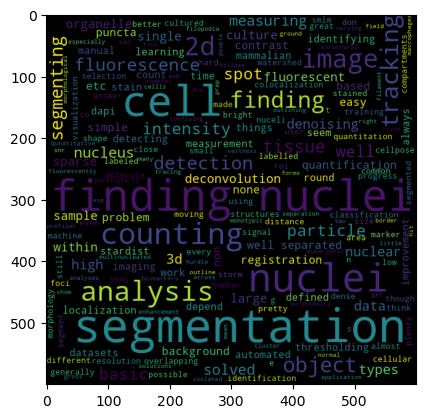

In [138]:
# wordcloud for well solved image analysis problems 
input = ''.join(data["Well solved image analysis problems"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=5).generate(input)
plt.imshow(well_solved_wc)

In [271]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


In [277]:
well_solved = data["Well solved image analysis problems"].dropna().to_frame()

well_solved['wellsoved_lemmatized'] = well_solved['Well solved image analysis problems'].apply(lemmatize_text)
well_solved
str_lem= well_solved["wellsoved_lemmatized"].astype(str)

Well solved image analysis problems
2                            segmentation and tracking
3               Basic segmentation esp in cell culture
5                                  nuceli segmentation
8     Segmentation, object classification, 2D analyses
9                                       finding nuclei
..                                                 ...
487                                     finding nuclei
488  2D segmentation for fluorescence images, speci...
490  Finding nuclei stained with DAPI and then quan...
491                                     finding nuclei
492                                     finding nuclei

[270 rows x 1 columns]

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\1797745285.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Text(0.5, 1.0, 'Lemmatized')

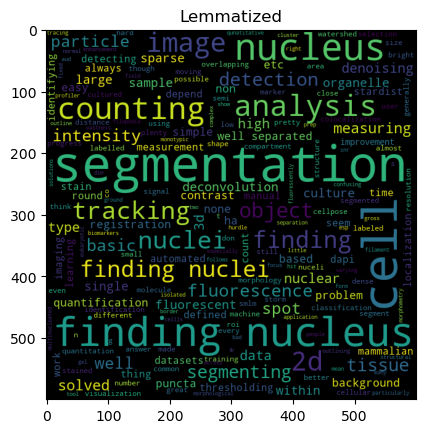

In [291]:
# wordcloud for well solved image analysis problems - with lemmatized text
input_lem = ''.join(str_lem.str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_lem = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=5).generate(input_lem)
plt.imshow(well_solved_lem)
plt.title('Lemmatized')

In [287]:
# stemming - well solved 
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
well_solved['stemmed'] = well_solved['Well solved image analysis problems'].apply(lambda x: [stemmer.stem(y) for y in w_tokenizer.tokenize(x)]) 

In [288]:
well_solved

Well solved image analysis problems  \
2                            segmentation and tracking   
3               Basic segmentation esp in cell culture   
5                                  nuceli segmentation   
8     Segmentation, object classification, 2D analyses   
9                                       finding nuclei   
..                                                 ...   
487                                     finding nuclei   
488  2D segmentation for fluorescence images, speci...   
490  Finding nuclei stained with DAPI and then quan...   
491                                     finding nuclei   
492                                     finding nuclei   

                                  wellsoved_lemmatized  \
2                        [segmentation, and, tracking]   
3        [Basic, segmentation, esp, in, cell, culture]   
5                               [nuceli, segmentation]   
8    [Segmentation,, object, classification,, 2D, a...   
9                                   [finding, nucleus]   
..                                                 ...   
487                                 [finding, nucleus]   
488  [2D, segmentation, for, fluorescence, images,,...   
490  [Finding, nucleus, stained, with, DAPI, and, t...   
491                                 [finding, nucleus]   
492                                 [finding, nucleus]   

                                               stemmed  
2                                [segment, and, track]  
3              [basic, segment, esp, in, cell, cultur]  
5                                      [nuce, segment]  
8    [segmentation,, object, classification,, 2d, a...  
9                                       [find, nuclei]  
..                                                 ...  
487                                     [find, nuclei]  
488  [2d, segment, for, fluoresc, images,, special,...  
490  [find, nuclei, stain, with, dapi, and, then, q...  
491                                     [find, nuclei]  
492                                     [find, nuclei]  

[270 rows x 3 columns]

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\2081257608.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



Text(0.5, 1.0, 'Stemmed')

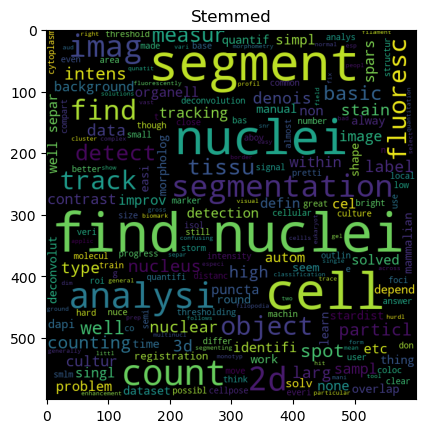

In [292]:
# wordcloud for well solved image analysis problems - with stemmed text
str_stem = well_solved['stemmed'].astype(str)
input_stem = ''.join(str_stem.str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_stem = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=5).generate(input_stem)
plt.imshow(well_solved_stem)
plt.title('Stemmed')

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\317968450.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



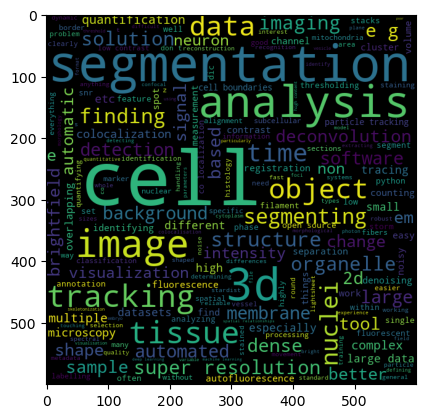

In [72]:
# wordcloud for image analysis problems which need better solutions
input_better = ''.join(data["Image analysis problems which needs better solutions"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_better = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=5).generate(input_better)
plt.imshow(well_solved_better)

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\3267495201.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Text(0.5, 1.0, 'Creators role')

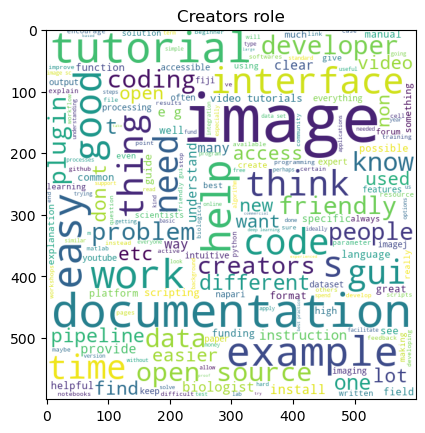

In [270]:
# wordcloud for creators role
input_creator = ''.join(data["Creators role"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords_new = ['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use'] + list(STOPWORDS)
well_solved_creator = WordCloud(stopwords=stopwords_new, background_color='white', width=600, height=600, random_state=1).generate(input_creator)
plt.imshow(well_solved_creator)
plt.title('Creators role')

In [ ]:
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(creator_df)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
creator_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

In [ ]:
creator_bigram.head(30)

frequency               bigram
0          15            step step
1          15          open source
2           9      video tutorials
3           4          open access
4           4             image sc
5           4   good documentation
6           4        deep learning
7           3           would help
8           3          would great
9           3       step tutorials
10          3       intuitive guis
11          3           help pages
12          3  friendly interfaces
13          3         easy install
14          3            data sets
15          3       best practices
16          2       youtube videos
17          2    written tutorials
18          2         would useful
19          2        would helpful
20          2           world data
21          2              wet lab
22          2       want something
23          2       videos showing
24          2       tutorials help
25          2   tutorials creators
26          2         track nuclei
27          2       think creators
28          2          talk people
29          2          step guides

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\1057716150.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Text(0.5, 1.0, 'Users role')

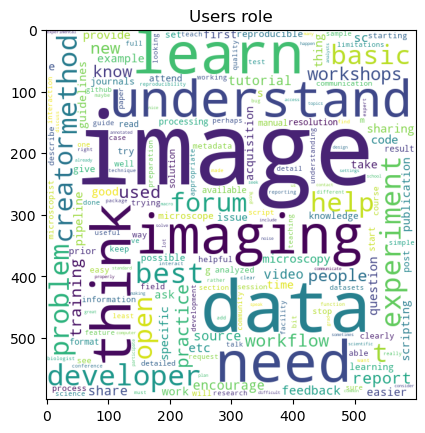

In [234]:
# wordcloud for users role
input_user = ''.join(data["Users role"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
stopwords_user = ['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'don'] + list(STOPWORDS)
well_solved_user = WordCloud(stopwords=stopwords_user, background_color='white', width=600, height=600, random_state=1, collocations=False).generate(input_user)
plt.imshow(well_solved_user)
plt.title('Users role')

In [238]:
#Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful? If yes, what made them beneficial?
workshops = data["Experience with previous workshops/conferences"].str.lower().str.strip()
workshops = workshops.dropna(how='all').to_frame()

#creating new columns based on the values in the query column
workshops["NEUBIAS"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'neubias' in x else False)
workshops["Fiji/ImageJ"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if ('imagej' in x) or ('fiji' in x) else False)
workshops["Cellprofiler"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'cellprofiler' in x else False)
workshops["Imaris"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'imaris' in x else False)
workshops["Robert Hasse"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'robert' in x else False)
workshops["AQLM"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'aqlm' in x else False)
workshops["CSHL"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'cshl' in x else False)
workshops["I2K"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'i2k' in x else False)
workshops["EMBL"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'embl' in x else False)

#Chart
workshops_for_chart = workshops.drop(columns=['Experience with previous workshops/conferences', 'CSHL'])
workshops_for_chart = workshops_for_chart.sum().to_frame()
workshops_chart = px.bar(workshops_for_chart, labels={'value':'counts', 'index':''}, text_auto=True)
workshops_chart.update_layout(title_x=0.5, title='Workshops attended by the participants', width=500, height=500, showlegend=False, font=dict(family='Helvetica', color="Black", size=16))
workshops_chart.update_xaxes(categoryorder = 'total descending')


In [244]:

from collections import Counter
addition = data["Recommended conferences/workshops"]
addition = addition.dropna(how='all')
addition = addition.str.lower().str.strip()
addition = list(addition)
addition_list = [i.split() for i in addition]
addition_list = np.concatenate(addition_list)
addition_list = [i.replace('(', '') for i in addition_list]
addition_list = [i.replace('/', '') for i in addition_list]
addition_list = [i.replace(')', '') for i in addition_list]

addition_list_updated = list(addition_list)
type(addition_list_updated)
remove = ['of','the','to','and', 'no', 'i','a', 'any', 'would','them', 'for', 'in','can','much', 'into', 'most', 'that', 'are', 'it', 'from', 'but', 'be', 'with', 'none', 'dont', 'think', 'more', 'could', 'not', 'on', 'at', 'is','if', 'this', 'have', 'yes', 'or', 'etc.']
addition_list_updated = [i for i in addition_list if i not in remove]
addition_list_updated
len(Counter(addition_list_updated))

375

In [246]:
#Are there any conferences you've attended in the past that you think would particularly benefit from the addition/expansion of image analysis offerings?
df_conf = data["Recommended conferences/workshops"].dropna()
# Creating a dataframe of unigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_conf)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
conf_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})

In [248]:
# Creating a dataframe of bigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_conf)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
conf_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

In [252]:
# Creating a dataframe of trigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_conf)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
conf_trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

In [247]:
conf_unigram.head(30)

frequency      unigram
0          18   conference
1          16     analysis
2          12          yes
3          12   microscopy
4          12        image
5          11  conferences
6          11      biology
7          11         ascb
8           9        would
9           9        think
10          8      society
11          7          mmc
12          7         elmi
13          7      benefit
14          7     attended
15          6      imaging
16          6        could
17          5     sessions
18          5      session
19          5         abrf
20          4     workshop
21          4         none
22          4      neubias
23          4      meeting
24          3       useful
25          3      related
26          3       pretty
27          3    pathology
28          3     meetings
29          3        large

In [255]:
conf_bigram.head(10)

frequency                 bigram
0         11         image analysis
1          4          could benefit
2          4     biology conference
3          3  microscopy conference
4          3  developmental biology
5          3           cell biology
6          2          would benefit
7          2            think large
8          2            think every
9          2          something new

In [254]:
conf_trigram.head(10)

frequency                    trigram
0          2     image analysis methods
1          2   dedicated image analysis
2          2   conference could benefit
3          2    cell biology conference
4          1            yes rna imaging
5          1  yes meetings pathological
6          1      yes digital pathology
7          1      would useful actually
8          1       would like afmbiomed
9          1       would highly benefit

In [263]:
#creating a dataframe for the conferences 

data_df = [['ASCB', 11], ['ELMI', 7], ['ABRF', 5], ['NEUBIAS', 4], ['MMC', 7], ['Biophysical society', 2]]
conf_df = pd.DataFrame(data_df, columns=['Conferences', 'Counts'])
conf_df_chart = px.bar(conf_df, x='Conferences', y='Counts', width=500, height=500,labels={'Conferences':''}, text_auto=True)
conf_df_chart.update_layout(font=dict(family='Helvetica', color="Black", size=16))
conf_df_chart.update_xaxes(categoryorder='total descending')

In [ ]:
#topics for future workshops/tutorials 
topics_future = data['Topics of interest']
topics_future = topics_future.dropna(how='all')
topics_future = topics_future.str.lower().str.strip()
topics_future_list = list(topics_future)
topics_future_list

["how to be sure you're using the correct tool. what is the underlying algorithm and why is this correct for my particular image analysis problem?",
 'build up customized plugin (imagej or other powerful software)',
 'more software and plugin development, particularly imagej2/imglib2 development',
 'i think general image analysis workshops are lacking and sometimes the offers are "too specific/niche/specialized" which might be off putting for new attendees.',
 'image analysis theory',
 'comparisons between pieces of software',
 'ai/dl approaches for segmentation',
 'not sure.',
 "i'd love intermediate level. most of the conferences i see are either very basic fiji/python or full on heavy program development. right now i'm trying to bridge the gap between those two spaces and finding it quite difficult to find the right resource. or even a course/seminar on how to move from primarily lab-based to primarily computational and what roles are available.\n\ni'd also love sessions on how to i

In [196]:
topic_data = data["Topics of interest"].dropna(how='all').to_frame()


In [ ]:
import nltk
nltk.download('stopwords')
stoplist = stopwords.words('english') 

In [ ]:
# Creating a dataframe of unigrams - topics of interest
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_data["Topics of interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
# Creating a dataframe of bigrams - topics of interest
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_data["Topics of interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
# Creating a dataframe of trigrams - topics of interest
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_data["Topics of interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_unigram.head(30)

frequency bigram/trigram
0          67       analysis
1          48          image
2          44          tools
3          41       software
4          40            use
5          30       learning
6          29           data
7          21   segmentation
8          21           deep
9          19          would
10         19           tool
11         18          using
12         17        certain
13         16         python
14         15         napari
15         15      different
16         15    comparisons
17         14       specific
18         14         images
19         13         source
20         13           open
21         13           cell
22         13             3d
23         12      tutorials
24         12           like
25         12         imagej
26         11     particular
27         10     processing
28         10         coding
29          9         useful

In [ ]:
df_bigram.head(30)

frequency         bigram/trigram
0          33         image analysis
1          20          deep learning
2          12            open source
3          10            use certain
4           7       machine learning
5           6           tool certain
6           6        kind experiment
7           5           would useful
8           5           certain tool
9           5           certain kind
10          4           source tools
11          4        source software
12          4          python napari
13          4        pieces software
14          4     different software
15          4     comparisons pieces
16          4          certain tools
17          4      cell segmentation
18          4         best practices
19          3        video tutorials
20          3             using open
21          3              step step
22          3              pros cons
23          3              new tools
24          3             need learn
25          3    learning approaches
26          3   comparisons software
27          3  comparisons different
28          3               big data
29          3         analysis tools

In [ ]:
df_trigram.head(30)

frequency                bigram/trigram
0           5              use certain tool
1           5             tool certain kind
2           5          certain tool certain
3           5       certain kind experiment
4           4             use certain tools
5           4          open source software
6           4   comparisons pieces software
7           3             using open source
8           3             open source tools
9           3      deep learning approaches
10          2                would love see
11          2             people need learn
12          2       learning overview tools
13          2          image analysis using
14          2         image analysis theory
15          2       image analysis software
16          2    image analysis limitations
17          2           good image analysis
18          1        years showing findings
19          1           would super helpful
20          1                would say kind
21          1        would prepared outcome
22          1         would note clustering
23          1                would like see
24          1              would like learn
25          1      would immensely valuable
26          1      would greatly beneficial
27          1                would good lot
28          1  workshops microscopy related
29          1   workshops lacking sometimes

In [259]:
#2022 data based on the unigrams, bigrams and trigrams 
topic_data["Python/coding/script"] = topic_data["Topics of interest"].str.contains('python|coding|script', case=False)
topic_data["Segmentation"] = topic_data['Topics of interest'].str.contains('segmentation|cell segmentation', case=False)
topic_data["napari"] = topic_data['Topics of interest'].str.contains('napari', case=False)
topic_data["Certain tools"] = topic_data['Topics of interest'].str.contains('certain tool|certain tools', case=False)
topic_data["Open source"] = topic_data['Topics of interest'].str.contains('open source', case=False)
topic_data["Deep/machine learning"] = topic_data['Topics of interest'].str.contains('deep|machine', case=False)
topic_data["Fiji/ImageJ/Macro"] = topic_data['Topics of interest'].str.contains('imagej|fiji|macro', case=False)
topic_data["Best practices"] = topic_data['Topics of interest'].str.contains('best practices', case=False)
topic_data["Cellprofiler"] = topic_data['Topics of interest'].str.contains('cellprofiler', case=False)
topic_data["Comparisons"] = topic_data['Topics of interest'].str.contains('comparison', case=False)

In [261]:
topic_data_1 = topic_data.drop(columns=['Topics of interest'])
topic_data_sum = topic_data_1.sum()

#chart for the topics of interest for the future workshop
topic_data_chart = px.bar(topic_data_sum, labels={'value':'counts', 'index':''}, text_auto=True)
topic_data_chart.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, showlegend=False, font=dict(family='Helvetica', color="Black", size=16))
topic_data_chart.update_xaxes(categoryorder='total descending')



In [267]:
#any other thoughts?
other = data['Other thoughts'].dropna()
# Creating a dataframe of unigrams - other thoughts
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_conf)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
other_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

In [269]:
other_unigram.head(10)

frequency      unigram
0         18   conference
1         16     analysis
2         12          yes
3         12   microscopy
4         12        image
5         11  conferences
6         11      biology
7         11         ascb
8          9        would
9          9        think

In [268]:
other_bigram.head(10)

frequency                 bigram
0         11         image analysis
1          4          could benefit
2          4     biology conference
3          3  microscopy conference
4          3  developmental biology
5          3           cell biology
6          2          would benefit
7          2            think large
8          2            think every
9          2          something new

In [199]:
#Comparing with the previous years data (topics of interest for the image analysis tutorials)

topic_interest_data_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_specific_topics_ie_overviews_of_a_particular_tool_comparisons_between_pieces_of_software_or_how_to_use_a_certain_tool_for_a_certain_kind_of_experiment_would_you_like_to_s.txt')
topic_interest_data_2021= topic_interest_data_2021.rename(columns={'0':'interest'})

In [200]:
#unigrams from 2021
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_interest_data_2021["interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_2021_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})

In [ ]:
df_2021_unigram.head(30)

frequency       unigram
0          81      analysis
1          58         tools
2          57         image
3          44      learning
4          42      software
5          39          data
6          36           use
7          33          tool
8          32         would
9          30            3d
10         27          deep
11         25       certain
12         24        python
13         22          open
14         21        source
15         21        imagej
16         21          fiji
17         21     different
18         20  segmentation
19         16          like
20         16       imaging
21         16          best
22         15      specific
23         14      tracking
24         14    particular
25         14      overview
26         14       machine
27         14        images
28         14          cell
29         13    comparison

In [ ]:
#bigrams from 2021
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_interest_data_2021["interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_2021_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

In [ ]:
df_2021_bigram.head(30)

frequency            bigram
0          33    image analysis
1          24     deep learning
2          20       open source
3          13  machine learning
4          12       use certain
5          12      certain tool
6          10    analysis tools
7           8      tool certain
8           8      certain kind
9           7   kind experiment
10          6   source software
11          6       imagej fiji
12          6         data sets
13          5      would useful
14          5     would helpful
15          5    software would
16          5   particular tool
17          5     cell tracking
18          4        would like
19          4          like see
20          4  image processing
21          4     data analysis
22          4          big data
23          4    best practices
24          4   analysis python
25          4           3d data
26          4             2d 3d
27          3          use tool
28          3       tracking 3d
29          3        tool would

In [322]:
#topics of interest for the tutorials with 2021 data 
topic_interest_data_2021["Python/coding/script"] = topic_interest_data_2021["interest"].str.contains('python|coding|script', case=False)
topic_interest_data_2021["Segmentation"] = topic_interest_data_2021['interest'].str.contains('segmentation|cell segmentation', case=False)
topic_interest_data_2021["napari"] = topic_interest_data_2021['interest'].str.contains('napari', case=False)
topic_interest_data_2021["Certain tools"] = topic_interest_data_2021['interest'].str.contains('certain tool', case=False)
topic_interest_data_2021["Open source"] = topic_interest_data_2021['interest'].str.contains('open source', case=False)
topic_interest_data_2021["Deep/machine learning"] = topic_interest_data_2021['interest'].str.contains('deep|machine', case=False)
topic_interest_data_2021["Fiji/ImageJ/Macro"] = topic_interest_data_2021['interest'].str.contains('imagej|fiji|macro', case=False)
topic_interest_data_2021["Best practices"] = topic_interest_data_2021['interest'].str.contains('best practices', case=False)
topic_interest_data_2021["Cellprofiler"] = topic_interest_data_2021['interest'].str.contains('cellprofiler', case=False)
topic_interest_data_2021["Comparisons"] = topic_interest_data_2021['interest'].str.contains('comparison', case=False)

topic_data_2021 = topic_interest_data_2021.drop(columns=['interest', 'Fiji/ImageJ/macro'])
topic_data_2021_sum = topic_data_2021.sum()

#chart for the topics of interest for the future workshop
topic_data_2021_chart = px.bar(topic_data_2021_sum, labels= {'value':'counts', 'index':''}, text_auto=True)
topic_data_2021_chart.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, showlegend=False)
topic_data_2021_chart.update_xaxes(categoryorder='total descending')

### **Comparison with 2020 data**

In [ ]:
# pie chart for the roles of the survey participants 
role_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Which_of_the_following_roles_best_describes_you.txt')
role_2021= role_2021.rename(columns={'0':'role'})
role_2021['category'] = role_2021['role'].apply(lambda x: 'Other' if x not in ['Postdoctoral fellow','Undergraduate/Graduate student', 'Principal investigator', 'Facility staff', 'Research scientist', 'Image analyst', 'Facility director', 'Clinician'] else x)
role_2021['category_1'] = role_2021['category'].apply(lambda x: 'Image/data analyst' if x=='Image analyst' else x)
role_2021["category_1"].value_counts()


Postdoctoral fellow               108
Undergraduate/Graduate student     99
Principal investigator             70
Facility staff                     65
Research scientist                 62
Image/data analyst                 30
Facility director                  28
Other                              21
Clinician                           1
Name: category_1, dtype: int64

In [ ]:
#combined figure
role_2021_2022 = go.Figure()

role_2021_2022.add_traces(go.Bar(name='2020', x=role_2021["category_1"].value_counts().index, y=role_2021["category_1"].value_counts().values, orientation='v', text=role_2021["category_1"].value_counts().values))
role_2021_2022.add_traces(go.Bar(name='2022', x=data['Role'].value_counts().index, y=data['Role'].value_counts().values, orientation='v', text=data['Role'].value_counts().values))
role_2021_2022.update_layout(width=600, height=500, title='Role', title_x=0.5, title_y=0.85, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
role_2021_2022.update_yaxes(categoryorder = 'total ascending')

In [ ]:
#location 
location_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Where_do_you_currently_primarily_work.txt')
location_2021= location_2021.rename(columns={'0':'location'})

#combined figure
loc = go.Figure()

loc.add_traces(go.Bar(name='2020', x=location_2021['location'].value_counts().index, y=location_2021['location'].value_counts().values, text=location_2021['location'].value_counts().values))
loc.add_traces(go.Bar(name='2022', x=data['Location'].value_counts().index, y=data['Location'].value_counts().values, text=data['Location'].value_counts().values))
loc.update_layout(width=500, height=500, title='Location', title_x=0.5, title_y=0.85, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [ ]:
# work type_2021
work_type_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_describe_your_work.txt')
work_type_2021= work_type_2021.rename(columns={'0':'work_type'})

In [ ]:
work_type_2021.loc[work_type_2021["work_type"] < 3, "Work type" ] = "Imaging"
work_type_2021.loc[(work_type_2021["work_type"] >= 3) & (work_type_2021["work_type"] < 5), "Work type"] = "Balanced"
work_type_2021.loc[work_type_2021["work_type"] >= 5, "Work type"] = "Analyst"
work_type_counts_2021 = work_type_2021["Work type"].value_counts()
work_type_counts_2021 

Balanced    289
Analyst     132
Imaging      63
Name: Work type, dtype: int64

In [ ]:
#knowledge in computational skills_2021 
comp_skill_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_rate_your_computational_skills.txt')
comp_skill_2021= comp_skill_2021.rename(columns={'0':'comp_skill'})

comp_skill_2021.loc[comp_skill_2021["comp_skill"] < 3, "Knowledge of computational skills"] = "Low skill"
comp_skill_2021.loc[(comp_skill_2021["comp_skill"] >= 3) & (comp_skill_2021["comp_skill"] < 5), "Knowledge of computational skills"] = "Medium skill"
comp_skill_2021.loc[comp_skill_2021["comp_skill"] >= 5, "Knowledge of computational skills"] = "High skill"
computational_knowledge_2021 = comp_skill_2021["Knowledge of computational skills"].value_counts()
computational_knowledge_2021

High skill      238
Medium skill    181
Low skill        65
Name: Knowledge of computational skills, dtype: int64

In [ ]:
# comparing 2021 and 2022 work type
work_21_22 = go.Figure()

work_21_22.add_trace(go.Bar(name=2020, x=work_type_counts_2021.index, y=work_type_counts_2021.values, text=work_type_counts_2021.values))
work_21_22.add_trace(go.Bar(name=2022, x=work_type_counts.index , y=work_type_counts.values, text=work_type_counts.values))

work_21_22.update_layout(title = 'Work type', title_x=0.5, width=400, height=400, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [ ]:
# comparing 2021 and 2022 work type and comp skill in percentage
from plotly.subplots import make_subplots

work_21_22_percent= go.Figure()
work_21_22_percent = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

work_21_22_percent.add_trace(go.Pie(labels=work_type_counts_2021.index, values=work_type_counts_2021.values), 1,1)
work_21_22_percent.add_trace(go.Pie(labels = work_type_counts.index , values=work_type_counts.values),1,2)
work_21_22_percent.update_traces(hole=.4, hoverinfo="label+percent+name")
work_21_22_percent.update_layout(title_x=0.5, title_y=0.80, title_text="Work type", annotations=[dict(text='2020', x=0.18, y=0.5, font_size=16, showarrow=False),dict(text='2022', x=0.82, y=0.5, font_size=16, showarrow=False)])
work_21_22_percent.update_layout(font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
work_21_22_percent.update_layout(width=600, height=350)

In [ ]:
# comparing 2021 and 2022 comp skill
comp_skill_21_22 = go.Figure()

comp_skill_21_22.add_trace(go.Bar(name=2020, x= computational_knowledge_2021.index, y=computational_knowledge_2021.values, text=computational_knowledge_2021.values))
comp_skill_21_22.add_trace(go.Bar(name=2022, x=computational_knowledge.index , y=computational_knowledge.values, text=computational_knowledge.values))

comp_skill_21_22.update_layout(title = 'Computational knowledge', title_x=0.5, width=400, height=400, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [ ]:
# comfort in developing new computational skills 
comf_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_rate_your_comfort_in_developing_new_computational_skills.txt')
comf_2021= comf_2021.rename(columns={'0':'comfort'})

# Comfort in developing new computational skills
comf_2021.loc[comf_2021["comfort"] < 3, 'Comfort'] = 'Low comfort'
comf_2021.loc[(comf_2021['comfort'] >= 3) & (comf_2021['comfort'] < 5), 'Comfort'] = "Medium comfort"
comf_2021.loc[comf_2021['comfort'] >= 5 , 'Comfort'] = "High comfort"


In [ ]:

#Comparing comfort in developing new computational skills
comf_21_22 = go.Figure()

comf_21_22.add_trace(go.Bar(name=2020, x= comf_2021['Comfort'].value_counts().index, y=comf_2021['Comfort'].value_counts().values, text=comf_2021['Comfort'].value_counts().values))
comf_21_22.add_trace(go.Bar(name=2022, x=data['Comfort'].value_counts().index, y=data['Comfort'].value_counts().values, text=data['Comfort'].value_counts().values))

comf_21_22.update_layout(title = 'Comfort in developing <br> new computational skills', title_x=0.5, width=400, height=400, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [ ]:
#solving image analysis problems- 2020

sol_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_do_you_generally_go_about_solving_an_image_analysis_problem_Check_the_approaches_you_use_the_most.txt')
sol_2021 = sol_2021.rename(columns={'0':'solution'})

sol_2021['Play with a tool'] = sol_2021['solution'].apply(lambda x: True if 'Sit down with a tool I know and start playing with the data' in x else False)
sol_2021["Ask a friend or colleague"] = sol_2021["solution"].apply(lambda x: True if 'Ask a friend or colleague to help me'in x else False)
sol_2021["Ask on image sc forum"] = sol_2021["solution"].apply(lambda x: True if 'Ask on forum.image.sc'in x else False)
sol_2021['Google'] = sol_2021["solution"].apply(lambda x: True if 'Google' in x else False)
sol_2021["Particluar websites"] = sol_2021["solution"].apply(lambda x:True if "particular website" in x else False)
sol_2021["Scientific literature"] = sol_2021["solution"].apply(lambda x: True if 'scientific literature' in x else False)
sol_2021["Other"] = sol_2021['solution'].apply(lambda x: True if x not in ['Sit down with a tool I know and start playing with the data', 'Ask a friend or colleague to help me', 'Ask on forum.image.sc', 'Look up solutions generally on the internet (Google)', 'Look up solutions on a particular website (please list below)', 'Look up solutions in the scientific literature'] else False )

#creating a subset of the above dataframe 
sol_2021_subset = sol_2021.iloc[:,1:8]
sol_2021_df = sol_2021_subset.sum()
sol_2021_df = pd.DataFrame(sol_2021_df)
sol_2021_df = sol_2021_df.reset_index()
sol_2021_df = sol_2021_df.rename(columns={'index':'Tool', 0 :'counts'})
sol_2021_df

Tool  counts
0           Play with a tool     429
1  Ask a friend or colleague     201
2      Ask on image sc forum     104
3                     Google     345
4        Particluar websites      40
5      Scientific literature     227
6                      Other     437

In [ ]:
#Comparing - approaches to image analysis problems 
sol_21_22 = go.Figure()

sol_21_22.add_trace(go.Bar(name=2020, x= sol_2021_df["Tool"], y=sol_2021_df['counts'], text=sol_2021_df['counts']))
sol_21_22.add_trace(go.Bar(name=2022, x=ways_people_analyze_data_subset, y =ways_people_analyze_data_values, text=ways_people_analyze_data_values))

sol_21_22.update_layout(title = 'Approaches to image analysis problems', title_x=0.5, width=500, height=400, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))


In [ ]:
#Notifications of the future workshops
notifications_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_prefer_to_be_notified_about_image_analysis_workshops_sessions_or_conferences_being_planned.txt')
notifications_2021 = notifications_2021.rename(columns={'0':'Notifications'})
notifications_2021['notify'] = notifications_2021['Notifications'].apply(lambda x: 'Other' if x not in ['Email list', 'Postings on image.sc forum or microforum', 'Twitter', 'My local microscopy facility', 'Word of mouth'] else x)

#Comparison - 2020 ad 2022
not_21_22 = go.Figure()

not_21_22.add_trace(go.Bar(name='2020', y=notifications_2021['notify'].value_counts().index, x=notifications_2021['notify'].value_counts().values, orientation='h', text=notifications_2021['notify'].value_counts().values))
not_21_22.add_trace(go.Bar(name='2022', y=counts_notifications['notify'].value_counts().index, x=counts_notifications['notify'].value_counts().values, orientation='h', text=counts_notifications['notify'].value_counts().values))
not_21_22.update_layout(title='Notifications for the future image analysis workshops', title_x=0.5, title_y=0.9, width=600, height=500)
not_21_22.update_yaxes(categoryorder='total ascending')
not_21_22.update_layout(font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))

In [ ]:
#most used image analysis tools
most_used_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_tools_do_you_use_the_most.txt')
most_used_2021 = most_used_2021.rename(columns={'0':'most_used_tools'})

#using the following instead of teh value counts since the legends couldn't be shortened 
most_used_2021['Commercial software that comes with my microscope'] = most_used_2021['most_used_tools'].apply(lambda x:True if x == 'Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)' else False)
most_used_2021['Other commercial software'] = most_used_2021['most_used_tools'].apply(lambda x: True if x == 'Other commercial software (Imaris, Volocity, etc)' else False)
most_used_2021['Open source point-and-click software'] = most_used_2021['most_used_tools'].apply(lambda x: True if x == 'Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)'else False)
most_used_2021['Computational libraries and scripts'] = most_used_2021['most_used_tools'].apply(lambda x:True if x == 'Computational libraries and scripts (scikit-image, MATLAB, etc)' else False)
most_used_2021['None'] = most_used_2021['most_used_tools'].apply(lambda x:True if x == 'None' else False)
most_used_2021_subset = most_used_2021.iloc[:, 1:6]
most_used_2021_subset

#creating a subset
most_used_2021_df = pd.DataFrame(most_used_2021_subset.sum())
most_used_2021_df = most_used_2021_df.reset_index()
most_used_2021_df = most_used_2021_df.rename(columns={'index':'tools', 0 :'counts'})
most_used_2021_df


tools  counts
0  Commercial software that comes with my microscope      34
1                          Other commercial software      34
2               Open source point-and-click software     323
3                Computational libraries and scripts      77
4                                               None       0

In [ ]:
#comparing with 2022
most_used_21_22 = go.Figure()

most_used_21_22.add_trace(go.Bar(name='2020', x= most_used_2021_df['counts'], y=most_used_2021_df['tools'], orientation='h', text=most_used_2021_df['counts']))
most_used_21_22.add_trace(go.Bar(name='2022', x=counts_tools_df['counts'], y=counts_tools_df['tools'], orientation='h', text=counts_tools_df['counts']))
most_used_21_22.update_layout(title = 'Most used image analysis tools', title_x=0.5,title_y = 0.95, width=700, height=400)
most_used_21_22.update_layout(font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
most_used_21_22.update_yaxes(categoryorder='total ascending')


In [ ]:
#What image analysis tools have you used before?
com_tool_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_tools_have_you_used_before_check_all_that_apply.txt')
com_tool_2021 = com_tool_2021.rename(columns={'0':'com_used_tools'})

#Commonly used image analysis tools
com_tool_2021['Commonly used image analysis tools'] = com_tool_2021['com_used_tools'].astype(str) # this is done to ignore the Nan for analysis 
com_tool_2021["Commercial software with the microscope"] = com_tool_2021['com_used_tools'].apply(lambda x: True if 'Columbus' in x else False)
com_tool_2021["Other commercial software"] = com_tool_2021['com_used_tools'].apply(lambda x: True if 'Imaris' in x else False)
com_tool_2021["Open source point-and-click software"] = com_tool_2021["com_used_tools"].apply(lambda x: True if 'FIJI' in x else False)
com_tool_2021["Computational libraries and scripts"] = com_tool_2021["com_used_tools"].apply(lambda x: True if 'MATLAB' in x else False)
com_tool_2021["Tools_none"] = com_tool_2021["com_used_tools"].apply(lambda x: True if 'None' in x else False)

# creating a subset of the dataframe
com_tool_2021_subset = com_tool_2021.iloc[:, 2:7]
com_tool_2021_df = pd.DataFrame(com_tool_2021_subset.sum())
com_tool_2021_df = com_tool_2021_df.reset_index()
com_tool_2021_df = com_tool_2021_df.rename(columns={'index':'tools', 0:'counts'})
com_tool_2021_df

tools  counts
0  Commercial software with the microscope     305
1                Other commercial software     280
2     Open source point-and-click software     480
3      Computational libraries and scripts     274
4                               Tools_none       2

In [ ]:
# comparison of the commonly used image analysis tools - 2020 and 2022
com_tool_21_22 = go.Figure()

com_tool_21_22.add_trace(go.Bar(name='2020', y=com_tool_2021_df['tools'], x=com_tool_2021_df['counts'], text=com_tool_2021_df['counts'], orientation='h'))
com_tool_21_22.add_trace(go.Bar(name='2022', x=com_tool_df['counts'], y=com_tool_df['tools'], text=com_tool_df['counts'], orientation='h'))

com_tool_21_22.update_layout(width=700, height=400, title="Commonly used image analysis tools", title_x=0.5, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
com_tool_21_22.update_yaxes(categoryorder = 'total ascending')

In [ ]:
#what type of images do you commonly want to analyze?

# Brightfield manually acquired-2020
BF_manual_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Brightfield_DIC_phase-contrast_of_cells_or_organisms_from_manually_selected_fields.txt')
BF_manual_2020 = BF_manual_2020.rename(columns={'0':'BF_manual'})

BF_manual_2020["2D"] = BF_manual_2020["BF_manual"].apply(lambda x: True if '2D' in x else False)
BF_manual_2020["2D + time"] = BF_manual_2020["BF_manual"].apply(lambda x: True if '2D + time' in x else False)
BF_manual_2020["3D"] = BF_manual_2020["BF_manual"].apply(lambda x: True if '<3000' in x else False)
BF_manual_2020["3D + time"] = BF_manual_2020["BF_manual"].apply(lambda x: True if '3D + time' in x else False)
BF_manual_2020["3D (SPIM/large volume)"] = BF_manual_2020["BF_manual"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
BF_manual_2020["3D large volume + time"] = BF_manual_2020["BF_manual"].apply(lambda x: True if '3D large volume + time' in x else False)

BF_manual_2020_df = BF_manual_2020.drop(columns='BF_manual')
BF_manual_2020_df = BF_manual_2020_df.sum().to_frame().rename(columns={0:'Brightfield/DIC/phase-contrast manually acquired'})

In [ ]:
# Brightfield automated-2020
BF_automated_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Brightfield_DIC_phase-contrast_of_cells_or_organisms_from_an_automated_microscope.txt')
BF_automated_2020 = BF_automated_2020.rename(columns={'0':'BF_automated'})

BF_automated_2020["2D"] = BF_automated_2020["BF_automated"].apply(lambda x: True if '2D' in x else False)
BF_automated_2020["2D + time"] = BF_automated_2020["BF_automated"].apply(lambda x: True if '2D + time' in x else False)
BF_automated_2020["3D"] = BF_automated_2020["BF_automated"].apply(lambda x: True if '<3000' in x else False)
BF_automated_2020["3D + time"] = BF_automated_2020["BF_automated"].apply(lambda x: True if '3D + time' in x else False)
BF_automated_2020["3D (SPIM/large volume)"] = BF_automated_2020["BF_automated"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
BF_automated_2020["3D large volume + time"] = BF_automated_2020["BF_automated"].apply(lambda x: True if '3D large volume + time' in x else False)

BF_automated_2020_df = BF_automated_2020.drop(columns='BF_automated')
BF_auotmated_2020_df = BF_automated_2020_df.sum().to_frame().rename(columns={0:'Brightfield/DIC/phase-contrast automated'})

In [ ]:
#fluorescent manual -2020
fluorescent_manual_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Fluorescent_images_of_cells_organisms_from_manually_selected_fields.txt')
fluorescent_manual_2020 = fluorescent_manual_2020.rename(columns={'0':'Flo_manual'})

fluorescent_manual_2020["2D"] = fluorescent_manual_2020["Flo_manual"].apply(lambda x: True if '2D' in x else False)
fluorescent_manual_2020["2D + time"] = fluorescent_manual_2020["Flo_manual"].apply(lambda x: True if '2D + time' in x else False)
fluorescent_manual_2020["3D"] = fluorescent_manual_2020["Flo_manual"].apply(lambda x: True if '<3000' in x else False)
fluorescent_manual_2020["3D + time"] = fluorescent_manual_2020["Flo_manual"].apply(lambda x: True if '3D + time' in x else False)
fluorescent_manual_2020["3D (SPIM/large volume)"] = fluorescent_manual_2020["Flo_manual"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
fluorescent_manual_2020["3D large volume + time"] = fluorescent_manual_2020["Flo_manual"].apply(lambda x: True if '3D large volume + time' in x else False)

fluorescent_manual_2020_df = fluorescent_manual_2020.drop(columns='Flo_manual')
fluorescent_manual_2020_df = fluorescent_manual_2020_df.sum().to_frame().rename(columns={0:'Fluorescent images manually acquired'})

In [ ]:
#fluorescent automated -2020
fluorescent_automated_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Fluorescent_images_of_cells_organisms_from_an_automated_microscope.txt')
fluorescent_automated_2020 = fluorescent_automated_2020.rename(columns={'0':'Flo_automated'})

fluorescent_automated_2020["2D"] = fluorescent_automated_2020["Flo_automated"].apply(lambda x: True if '2D' in x else False)
fluorescent_automated_2020["2D + time"] = fluorescent_automated_2020["Flo_automated"].apply(lambda x: True if '2D + time' in x else False)
fluorescent_automated_2020["3D"] = fluorescent_automated_2020["Flo_automated"].apply(lambda x: True if '<3000' in x else False)
fluorescent_automated_2020["3D + time"] = fluorescent_automated_2020["Flo_automated"].apply(lambda x: True if '3D + time' in x else False)
fluorescent_automated_2020["3D (SPIM/large volume)"] = fluorescent_automated_2020["Flo_automated"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
fluorescent_automated_2020["3D large volume + time"] = fluorescent_automated_2020["Flo_automated"].apply(lambda x: True if '3D large volume + time' in x else False)

fluorescent_automated_2020_df = fluorescent_automated_2020.drop(columns='Flo_automated')
fluorescent_automated_2020_df = fluorescent_automated_2020_df.sum().to_frame().rename(columns={0:'Fluorescent images automated'})

In [ ]:
#histology in tissue sections-2020
histology_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Histologically_stained_tissue_sections.txt')
histology_2020 = histology_2020.rename(columns={'0':'histology'})

histology_2020["2D"] = histology_2020["histology"].apply(lambda x: True if '2D' in x else False)
histology_2020["2D + time"] = histology_2020["histology"].apply(lambda x: True if '2D + time' in x else False)
histology_2020["3D"] = histology_2020["histology"].apply(lambda x: True if '<3000' in x else False)
histology_2020["3D + time"] = histology_2020["histology"].apply(lambda x: True if '3D + time' in x else False)
histology_2020["3D (SPIM/large volume)"] = histology_2020["histology"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
histology_2020["3D large volume + time"] = histology_2020["histology"].apply(lambda x: True if '3D large volume + time' in x else False)

histology_2020_df = histology_2020.drop(columns='histology')
histology_2020_df = histology_2020_df.sum().to_frame().rename(columns={0:'Histological tissue sections'})

In [ ]:
#fluorescence in tissue sections-2020
flo_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Fluorescently_stained_tissue_sections.txt')
flo_2020 = flo_2020.rename(columns={'0':'flo_tissue'})

flo_2020["2D"] = flo_2020["flo_tissue"].apply(lambda x: True if '2D' in x else False)
flo_2020["2D + time"] = flo_2020["flo_tissue"].apply(lambda x: True if '2D + time' in x else False)
flo_2020["3D"] = flo_2020["flo_tissue"].apply(lambda x: True if '<3000' in x else False)
flo_2020["3D + time"] = flo_2020["flo_tissue"].apply(lambda x: True if '3D + time' in x else False)
flo_2020["3D (SPIM/large volume)"] = flo_2020["flo_tissue"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
flo_2020["3D large volume + time"] = flo_2020["flo_tissue"].apply(lambda x: True if '3D large volume + time' in x else False)

flo_2020_df = flo_2020.drop(columns='flo_tissue')
flo_2020_df = flo_2020_df.sum().to_frame().rename(columns={0:'Fluorescence in tissue sections'})

In [ ]:
#Electron microscopy -2020
elec_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Electron_microscopy.txt')
elec_2020 = elec_2020.rename(columns={'0':'Electron'})

elec_2020["2D"] = elec_2020["Electron"].apply(lambda x: True if '2D' in x else False)
elec_2020["2D + time"] = elec_2020["Electron"].apply(lambda x: True if '2D + time' in x else False)
elec_2020["3D"] = elec_2020["Electron"].apply(lambda x: True if '<3000' in x else False)
elec_2020["3D + time"] = elec_2020["Electron"].apply(lambda x: True if '3D + time' in x else False)
elec_2020["3D (SPIM/large volume)"] = elec_2020["Electron"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
elec_2020["3D large volume + time"] = elec_2020["Electron"].apply(lambda x: True if '3D large volume + time' in x else False)

elec_2020_df = elec_2020.drop(columns='Electron')
elec_2020_df = elec_2020_df.sum().to_frame().rename(columns={0:'Electron microscopy'})

In [ ]:
#Imaging mass spectrometry - 2020
ms_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Imaging_mass_spectrometry.txt')
ms_2020 = ms_2020.rename(columns={'0':'ms'})

ms_2020["2D"] = ms_2020["ms"].apply(lambda x: True if '2D' in x else False)
ms_2020["2D + time"] = ms_2020["ms"].apply(lambda x: True if '2D + time' in x else False)
ms_2020["3D"] = ms_2020["ms"].apply(lambda x: True if '<3000' in x else False)
ms_2020["3D + time"] = ms_2020["ms"].apply(lambda x: True if '3D + time' in x else False)
ms_2020["3D (SPIM/large volume)"] = ms_2020["ms"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
ms_2020["3D large volume + time"] = ms_2020["ms"].apply(lambda x: True if '3D large volume + time' in x else False)

ms_2020_df = ms_2020.drop(columns='ms')
ms_2020_df = ms_2020_df.sum().to_frame().rename(columns={0:'Imaging mass spectrometry'})

In [ ]:
#Imaging flow cytometry - 2020
fc_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Imaging_flow_cytometry.txt')
fc_2020 = fc_2020.rename(columns={'0':'fc'})

fc_2020["2D"] = fc_2020["fc"].apply(lambda x: True if '2D' in x else False)
fc_2020["2D + time"] = fc_2020["fc"].apply(lambda x: True if '2D + time' in x else False)
fc_2020["3D"] = fc_2020["fc"].apply(lambda x: True if '<3000' in x else False)
fc_2020["3D + time"] = fc_2020["fc"].apply(lambda x: True if '3D + time' in x else False)
fc_2020["3D (SPIM/large volume)"] = fc_2020["fc"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
fc_2020["3D large volume + time"] = fc_2020["fc"].apply(lambda x: True if '3D large volume + time' in x else False)

fc_2020_df = fc_2020.drop(columns='fc')
fc_2020_df = fc_2020_df.sum().to_frame().rename(columns={0:'Imaging flow cytometry'})

In [ ]:
#super resolution - 2020
sr_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Superresolution_PALM_STORM.txt')
sr_2020 = sr_2020.rename(columns={'0':'sr'})

sr_2020["2D"] = sr_2020["sr"].apply(lambda x: True if '2D' in x else False)
sr_2020["2D + time"] = sr_2020["sr"].apply(lambda x: True if '2D + time' in x else False)
sr_2020["3D"] = sr_2020["sr"].apply(lambda x: True if '<3000' in x else False)
sr_2020["3D + time"] = sr_2020["sr"].apply(lambda x: True if '3D + time' in x else False)
sr_2020["3D (SPIM/large volume)"] = sr_2020["sr"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
sr_2020["3D large volume + time"] = sr_2020["sr"].apply(lambda x: True if '3D large volume + time' in x else False)

sr_2020_df = sr_2020.drop(columns='sr')
sr_2020_df = sr_2020_df.sum().to_frame().rename(columns={0:'Superresolution (PALM/STORM)'})

In [ ]:
#FLIM -2020
flim_2020 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_kinds_of_images_do_you_commonly_want_to_analyze_Autofluorescence_imaging_ie_FLIM.txt')
flim_2020 = flim_2020.rename(columns={'0':'flim'})

flim_2020["2D"] = flim_2020["flim"].apply(lambda x: True if '2D' in x else False)
flim_2020["2D + time"] = flim_2020["flim"].apply(lambda x: True if '2D + time' in x else False)
flim_2020["3D"] = flim_2020["flim"].apply(lambda x: True if '<3000' in x else False)
flim_2020["3D + time"] = flim_2020["flim"].apply(lambda x: True if '3D + time' in x else False)
flim_2020["3D (SPIM/large volume)"] = flim_2020["flim"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
flim_2020["3D large volume + time"] = flim_2020["flim"].apply(lambda x: True if '3D large volume + time' in x else False)

flim_2020_df = flim_2020.drop(columns='flim')
flim_2020_df = flim_2020_df.sum().to_frame().rename(columns={0:'Autofluorescence imaging (ie FLIM)'})

In [ ]:
# combining all the dataframes - modality - 2020
modality_type_combined_2020 = pd.concat([BF_manual_2020_df, BF_auotmated_2020_df, fluorescent_manual_2020_df, fluorescent_automated_2020_df, histology_2020_df, flo_2020_df, elec_2020_df, ms_2020_df, fc_2020_df, sr_2020_df,flim_2020_df], axis=1)
modality_type_combined_2020 = modality_type_combined_2020.transpose()
modality_type_combined_2020 = modality_type_combined_2020.reset_index()
modality_type_combined_2020 = modality_type_combined_2020.rename(columns={'index':'modality'})

modality_type_combined_2020['sum'] = modality_type_combined_2020.iloc[:, 1:7].sum(axis=1)
modality_type_combined_2020

modality   2D  2D + time   3D  \
0   Brightfield/DIC/phase-contrast manually acquired  227        121   57   
1           Brightfield/DIC/phase-contrast automated  158        104   38   
2               Fluorescent images manually acquired  345        220  228   
3                       Fluorescent images automated  216        144  123   
4                       Histological tissue sections  172         23   27   
5                    Fluorescence in tissue sections  219         31  134   
6                                Electron microscopy   78          8   26   
7                          Imaging mass spectrometry   16          1    0   
8                             Imaging flow cytometry   19          6    1   
9                       Superresolution (PALM/STORM)   98         41   58   
10                Autofluorescence imaging (ie FLIM)   54         30   15   

    3D + time  3D (SPIM/large volume)  3D large volume + time   sum  
0          36                      11                       9   461  
1          27                       8                       6   341  
2         169                      80                      64  1106  
3         104                      46                      39   672  
4           6                      11                       5   244  
5          20                      43                      19   466  
6           4                      15                       1   132  
7           0                       0                       1    18  
8           1                       0                       1    28  
9          24                       3                       3   227  
10         15                       4                       4   122

In [ ]:
#Commonly analyzed images - 2020 and 2022

image_20_22 = go.Figure()

image_20_22.add_trace(go.Bar(name='2020', y=modality_type_combined_2020['modality'], x=modality_type_combined_2020['sum'], text=modality_type_combined_2020['sum'], orientation='h'))
image_20_22.add_trace(go.Bar(name='2022', y=modality_type_combined['modality'], x=modality_type_combined['sum'], text=modality_type_combined['sum'],  orientation='h'))

image_20_22.update_layout(width=1000, height=500, title="Commonly analyzed images", title_x=0.5,title_y=0.90, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
image_20_22.update_yaxes(categoryorder = 'total ascending')

In [ ]:
# Topics of interest for the tutorials - 2020 and 2022
int_2020_theory = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_Image_analysis_theory_.txt')
int_2020_theory = int_2020_theory.rename(columns={'0':'theory'})
int_2020_theory = int_2020_theory['theory'].value_counts().to_frame()

int_2020_practices = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_General_image_analysis_practices.txt')
int_2020_practices = int_2020_practices.rename(columns={'0':'practices'})
int_2020_practices = int_2020_practices['practices'].value_counts().to_frame()

int_2020_par_field = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_Image_analysis_practices_particular_to_my_field.txt')
int_2020_par_field = int_2020_par_field.rename(columns={'0':'Practices related to particular field'})
int_2020_par_field = int_2020_par_field['Practices related to particular field'].value_counts().to_frame()

int_2020_spc_tool = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_Learning_to_use_a_particular_software_tool.txt')
int_2020_spc_tool = int_2020_spc_tool.rename(columns={'0':'Specific software tool'})
int_2020_spc_tool = int_2020_spc_tool['Specific software tool'].value_counts().to_frame()

int_2020_DL = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_interested_are_you_in_learning_more_about_the_following_topics_Deep_learning_as_applied_to_image_analysis.txt')
int_2020_DL = int_2020_DL.rename(columns={'0':'Deep learning for image analysis'})
int_2020_DL = int_2020_DL['Deep learning for image analysis'].value_counts().to_frame()

In [ ]:
int_2020_com = pd.concat([int_2020_theory, int_2020_practices, int_2020_par_field, int_2020_spc_tool, int_2020_DL], axis=1)
int_2020_com = int_2020_com.rename(columns={'theory':'Image analysis theory', 'practices':'Image analysis practices'})
int_2020_com = int_2020_com.reset_index()
int_2020_com = int_2020_com.rename(columns={'index':'interest'})

#changing the value of the row since the it is 'A little interested' in 2020 and 'somewhat interested' in 2022
int_2020_com.loc[2,'interest'] = 'Somewhat interested'

#getting the percentage 
int_2020_com['percent_theory'] = (int_2020_com['Image analysis theory']/int_2020_com['Image analysis theory'].sum()) *100
int_2020_com['percent_practices'] = (int_2020_com['Image analysis practices']/int_2020_com['Image analysis practices'].sum()) *100
int_2020_com['percent_particular'] = (int_2020_com['Practices related to particular field']/int_2020_com['Practices related to particular field'].sum()) *100
int_2020_com['percent_sptool'] = (int_2020_com['Specific software tool']/int_2020_com['Specific software tool'].sum()) *100
int_2020_com['percent_DL'] = (int_2020_com['Deep learning for image analysis']/int_2020_com['Deep learning for image analysis'].sum()) *100

#rounding up the decimals
int_2020_com['percent_theory']= int_2020_com['percent_theory'].round(decimals=1)
int_2020_com['percent_practices'] = int_2020_com['percent_practices'].round(decimals=1)
int_2020_com['percent_particular'] = int_2020_com['percent_particular'].round(decimals=1)
int_2020_com['percent_sptool'] = int_2020_com['percent_sptool'].round(decimals=1)
int_2020_com['percent_DL'] = int_2020_com['percent_DL'].round(decimals=1)
int_2020_com

interest  Image analysis theory  Image analysis practices  \
0        Very interested                    182                       248   
1  Moderately interested                    147                       162   
2    Somewhat interested                    126                        68   
3  Not at all interested                     29                         6   

   Practices related to particular field  Specific software tool  \
0                                    360                     238   
1                                     94                     149   
2                                     28                      83   
3                                      2                      14   

   Deep learning for image analysis  percent_theory  percent_practices  \
0                               234            37.6               51.2   
1                               138            30.4               33.5   
2                                88            26.0               14.0   
3                                24             6.0                1.2   

   percent_particular  percent_sptool  percent_DL  
0                74.4            49.2        48.3  
1                19.4            30.8        28.5  
2                 5.8            17.1        18.2  
3                 0.4             2.9         5.0

In [ ]:
#editing the 2022 column 
trial_subset = trial.iloc[:, 0:6]
trial_subset = trial_subset.rename(columns={'Interes in topics Image analysis theory':'Image analysis theory', 'Interest in topics Image analysis practices':'Image analysis practices','Interest in topics related to sub discipline':'Practices related to particular field','Interest in topics Specific software tool':'Specific software tool', 'Interest in topics Deep learning for image analysis':'Deep learning for image analysis'})
trial_subset

#getting the percentage 
trial_subset['percent_theory'] = (trial_subset['Image analysis theory']/trial_subset['Image analysis theory'].sum()) *100
trial_subset['percent_practices'] = (trial_subset['Image analysis practices']/trial_subset['Image analysis practices'].sum()) *100
trial_subset['percent_particular'] = (trial_subset['Practices related to particular field']/trial_subset['Practices related to particular field'].sum()) *100
trial_subset['percent_sptool'] = (trial_subset['Specific software tool']/trial_subset['Specific software tool'].sum()) *100
trial_subset['percent_DL'] = (trial_subset['Deep learning for image analysis']/trial_subset['Deep learning for image analysis'].sum()) *100

#rounding up the decimals
trial_subset['percent_theory']= trial_subset['percent_theory'].round(decimals=1)
trial_subset['percent_practices'] = trial_subset['percent_practices'].round(decimals=1)
trial_subset['percent_particular'] = trial_subset['percent_particular'].round(decimals=1)
trial_subset['percent_sptool'] = trial_subset['percent_sptool'].round(decimals=1)
trial_subset['percent_DL'] = trial_subset['percent_DL'].round(decimals=1)
trial_subset

interest  Image analysis theory  Image analysis practices  \
0        Very interested                    157                       227   
1  Moderately interested                    150                       188   
2    Somewhat interested                    147                        69   
3  Not at all interested                     39                         9   

   Practices related to particular field  Specific software tool  \
0                                    341                     223   
1                                    109                     171   
2                                     36                      82   
3                                      7                      17   

   Deep learning for image analysis  percent_theory  percent_practices  \
0                               207            31.8               46.0   
1                               143            30.4               38.1   
2                               114            29.8               14.0   
3                                29             7.9                1.8   

   percent_particular  percent_sptool  percent_DL  
0                69.2            45.2        42.0  
1                22.1            34.7        29.0  
2                 7.3            16.6        23.1  
3                 1.4             3.4         5.9

In [ ]:
#comparison - topics of interest for the tutorials 
int_tut_20_22 = go.Figure()

int_tut_20_22 = make_subplots(rows=2, cols=3, subplot_titles=('Image analysis theory', 'Image analysis practices', 'Image analysis practices <br> related to particular field', 'Specific software tool', 'Deep learning for image analysis'))


int_tut_20_22.add_trace(go.Bar(name="2020", x=int_2020_com['interest'], y=int_2020_com['percent_theory'], text=int_2020_com['percent_theory'],marker_color= '#636EFA', legendgroup='group1'), row=1, col=1)
int_tut_20_22.add_trace(go.Bar(name="2022", x=trial_subset['interest'], y=trial_subset['percent_theory'], text=trial_subset['percent_theory'],marker_color= 'rgba(255, 0, 0, 0.6)', legendgroup='group1'), row=1, col=1)

int_tut_20_22.add_trace(go.Bar(x=int_2020_com['interest'], y=int_2020_com['percent_practices'], text=int_2020_com['percent_practices'],marker_color= '#636EFA', showlegend=False),row=1, col=2)
int_tut_20_22.add_trace(go.Bar(x=trial_subset['interest'], y=trial_subset['percent_practices'], text=trial_subset['percent_practices'],marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),row=1, col=2)

int_tut_20_22.add_trace(go.Bar(x=int_2020_com['interest'], y=int_2020_com['percent_particular'], text=int_2020_com['percent_particular'],marker_color= '#636EFA',showlegend=False),row=1, col=3)
int_tut_20_22.add_trace(go.Bar(x=trial_subset['interest'], y=trial_subset['percent_particular'], text=trial_subset['percent_particular'],marker_color= 'rgba(255, 0, 0, 0.6)',showlegend=False),row=1, col=3)

int_tut_20_22.add_trace(go.Bar(x=int_2020_com['interest'], y=int_2020_com['percent_sptool'], text=int_2020_com['percent_sptool'],marker_color= '#636EFA',showlegend=False),row=2, col=1)
int_tut_20_22.add_trace(go.Bar(x=trial_subset['interest'], y=trial_subset['percent_sptool'], text=trial_subset['percent_sptool'],marker_color= 'rgba(255, 0, 0, 0.6)',showlegend=False),row=2, col=1)

int_tut_20_22.add_trace(go.Bar(x=int_2020_com['interest'], y=int_2020_com['percent_DL'], text=int_2020_com['percent_DL'],marker_color= '#636EFA',showlegend=False),row=2, col=2)
int_tut_20_22.add_trace(go.Bar(x=trial_subset['interest'], y=trial_subset['percent_DL'], text=trial_subset['percent_DL'],marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),row=2, col=2)


int_tut_20_22.update_layout(width=1000, height=900, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
int_tut_20_22.update_yaxes(title='Percent')
int_tut_20_22.update_layout(title='Topics of interest for the future workshops', title_x =0.5)

In [ ]:
#Preferable instructional methods - 2020
art_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Scholarly_best_practices_article.txt')
art_20 = art_20.rename(columns={'0':'article'})
art_20 = art_20['article'].value_counts().to_frame()

wrt_tut_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Written_step-by-step_tutorial.txt')
wrt_tut_20 = wrt_tut_20.rename(columns={'0':'written tutorial'})
wrt_tut_20 = wrt_tut_20['written tutorial'].value_counts().to_frame()

vid_tut_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Video_tutorial.txt')
vid_tut_20 = vid_tut_20.rename(columns={'0':'video tutorial'})
vid_tut_20 = vid_tut_20['video tutorial'].value_counts().to_frame()

int_web_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Interactive_webinar.txt')
int_web_20 = int_web_20.rename(columns={'0':'interactive webinar'})
int_web_20 = int_web_20['interactive webinar'].value_counts().to_frame()

off_hr_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_One-on-one_office_hours_with_an_expert.txt')
off_hr_20 = off_hr_20.rename(columns={'0':'office hour'})
off_hr_20 = off_hr_20['office hour'].value_counts().to_frame()

one_day_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_In_person_seminar_tutorial_lasting_lessthan1_day.txt')
one_day_20 = one_day_20.rename(columns={'0':'one day'})
one_day_20 = one_day_20['one day'].value_counts().to_frame()

mul_day_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Multiday_workshop.txt')
mul_day_20 = mul_day_20.rename(columns={'0':'multi day'})
mul_day_20 = mul_day_20['multi day'].value_counts().to_frame()

In [ ]:
#Combining all the dataframes 
pre_tut_20 = pd.concat([art_20,wrt_tut_20,vid_tut_20,int_web_20,off_hr_20,one_day_20,mul_day_20], axis=1)
pre_tut_20 = pre_tut_20.reset_index()
pre_tut_20.loc[2, 'index'] = 'Somewhat interested'

#creating percentage columns 
pre_tut_20['percent_article'] = (pre_tut_20['article']/pre_tut_20['article'].sum())* 100
pre_tut_20['percent_article']= pre_tut_20['percent_article'].round(decimals=1)

pre_tut_20['percent_written'] = (pre_tut_20['written tutorial']/pre_tut_20['written tutorial'].sum())*100
pre_tut_20['percent_written']=pre_tut_20['percent_written'].round(decimals=1)

pre_tut_20['percent_video'] = (pre_tut_20['video tutorial']/pre_tut_20['video tutorial'].sum())*100
pre_tut_20['percent_video']= pre_tut_20['percent_video'].round(decimals=1)

pre_tut_20['percent_web'] = (pre_tut_20['interactive webinar']/pre_tut_20['interactive webinar'].sum())*100
pre_tut_20['percent_web']=pre_tut_20['percent_web'].round(decimals=1)

pre_tut_20['percent_off'] = (pre_tut_20['office hour']/pre_tut_20['office hour'].sum())*100
pre_tut_20['percent_off']=pre_tut_20['percent_off'].round(decimals=1)

pre_tut_20['percent_one'] = (pre_tut_20['one day']/pre_tut_20['one day'].sum())*100
pre_tut_20['percent_one']=pre_tut_20['percent_one'].round(decimals=1)

pre_tut_20['percent_mul'] = (pre_tut_20['multi day']/pre_tut_20['multi day'].sum())*100
pre_tut_20['percent_mul']=pre_tut_20['percent_mul'].round(decimals=1)

pre_tut_20

index  article  written tutorial  video tutorial  \
0  Moderately interested      210               138             112   
1        Very interested      143               304             277   
2    Somewhat interested      106                34              73   
3  Not at all interested       25                 8              22   

   interactive webinar  office hour  one day  multi day  percent_article  \
0                  150          133      161        154             43.4   
1                  202          161      144        149             29.5   
2                  103          135      124        133             21.9   
3                   29           55       55         48              5.2   

   percent_written  percent_video  percent_web  percent_off  percent_one  \
0             28.5           23.1         31.0         27.5         33.3   
1             62.8           57.2         41.7         33.3         29.8   
2              7.0           15.1         21.3         27.9         25.6   
3              1.7            4.5          6.0         11.4         11.4   

   percent_mul  
0         31.8  
1         30.8  
2         27.5  
3          9.9

In [ ]:
#preferable instructional methods - 2022
art = data["Preferable instructional methods articles"].value_counts().to_frame()
wrt = data["Preferable instructional methods written tutorials"].value_counts().to_frame()
vid = data["Preferable instructional methods Video tutorial"].value_counts().to_frame()
web = data["Preferable instructional methods Interactive webinar"].value_counts().to_frame()
off = data["Preferable instructional methods Office hours"].value_counts().to_frame()
one = data["Preferable instructional methods Seminar 1day"].value_counts().to_frame()
mul = data["Preferable instructional methods Multiday workshop"].value_counts().to_frame()

#combining all the dataframes
mtds = pd.concat([art, wrt, vid, web, off, one, mul], axis=1)
mtds = mtds.reset_index()
mtds['index'] = ['Somewhat interested', 'Moderately interested', 'Very interested', 'Not at all interested']

#creating percentage columns 
mtds['per_art'] = (mtds['Preferable instructional methods articles']/mtds['Preferable instructional methods articles'].sum())*100
mtds['per_art'] = mtds['per_art'].round(decimals=1)

mtds['per_wrt'] = (mtds['Preferable instructional methods written tutorials']/mtds['Preferable instructional methods written tutorials'].sum())*100
mtds['per_wrt'] =mtds['per_wrt'].round(decimals=1)

mtds['per_vid'] = (mtds['Preferable instructional methods Video tutorial']/mtds['Preferable instructional methods Video tutorial'].sum())*100
mtds['per_vid'] = mtds['per_vid'].round(decimals=1)

mtds['per_web'] = (mtds['Preferable instructional methods Interactive webinar']/mtds['Preferable instructional methods Interactive webinar'].sum())*100
mtds['per_web'] =mtds['per_web'].round(decimals=1)

mtds['per_off'] = (mtds['Preferable instructional methods Office hours']/mtds['Preferable instructional methods Office hours'].sum())*100
mtds['per_off'] = mtds['per_off'].round(decimals=1)

mtds['per_one'] = (mtds['Preferable instructional methods Seminar 1day']/mtds['Preferable instructional methods Seminar 1day'].sum())*100
mtds['per_one'] = mtds['per_one'].round(decimals=1)

mtds['per_mul'] = (mtds['Preferable instructional methods Multiday workshop']/mtds['Preferable instructional methods Multiday workshop'].sum())*100
mtds['per_mul'] = mtds['per_mul'].round(decimals=1)


In [ ]:
#comparison-graphs 
int_mtd_20_22 = go.Figure()

int_mtd_20_22 = make_subplots(rows=3, cols=3, subplot_titles=('Best practices articles', 'Written tutorial', 'Video tutorial', 'Interactive webinar', 'Office hours', 'In-person/one day workshop', 'Multi-day workshop'))

int_mtd_20_22.add_trace(go.Bar(name='2020',x=pre_tut_20['index'], y=pre_tut_20['percent_article'],text=pre_tut_20['percent_article'], marker_color= '#636EFA'),1,1)
int_mtd_20_22.add_trace(go.Bar(name='2022', x=mtds['index'], y=mtds['per_art'],text=mtds['per_art'], marker_color= 'rgba(255, 0, 0, 0.6)'),1,1) 

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_written'],text=pre_tut_20['percent_written'], marker_color= '#636EFA', showlegend=False),1,2)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_wrt'],text=mtds['per_wrt'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),1,2) 

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_video'],text=pre_tut_20['percent_video'], marker_color= '#636EFA', showlegend=False),1,3)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_vid'],text=mtds['per_vid'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),1,3) 

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_web'],text=pre_tut_20['percent_web'], marker_color= '#636EFA', showlegend=False),2,1)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_web'],text=mtds['per_web'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),2,1)

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_off'],text=pre_tut_20['percent_off'], marker_color= '#636EFA', showlegend=False),2,2)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_off'],text=mtds['per_off'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),2,2)

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_one'],text=pre_tut_20['percent_one'], marker_color= '#636EFA', showlegend=False),2,3)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_one'],text=mtds['per_one'], marker_color= 'rgba(255, 0, 0, 0.6)',showlegend=False),2,3)

int_mtd_20_22.add_trace(go.Bar(x=pre_tut_20['index'], y=pre_tut_20['percent_mul'],text=pre_tut_20['percent_mul'], marker_color= '#636EFA', showlegend=False),3,1)
int_mtd_20_22.add_trace(go.Bar(x=mtds['index'], y=mtds['per_mul'],text=mtds['per_mul'], marker_color= 'rgba(255, 0, 0, 0.6)', showlegend=False),3,1)

int_mtd_20_22.update_layout(width=1000, height=1000, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
int_mtd_20_22.update_yaxes(title='Percent')
int_mtd_20_22.update_xaxes(categoryorder='array',categoryarray = ['Very interested', 'Moderately interested', 'Somewhat interested','Not at all interested'])
int_mtd_20_22.update_layout(title='Preferable instructional methods', title_x =0.5)

In [182]:
# wordcloud for well solved image analysis problems_2021
from wordcloud import WordCloud, STOPWORDS
well_solved_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_think_are_generally_well-solved.txt')
well_solved_2021 = well_solved_2021.rename(columns= {'0':'well_solved'})

input_2021 = ''.join(well_solved_2021["well_solved"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))

stopwords = set(STOPWORDS)
well_solved_wc_2021 = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=4).generate(input_2021)
plt.imshow(well_solved_wc_2021)

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\3754549258.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



Text(0.5, 1.0, '2022')

<Figure size 640x480 with 0 Axes>

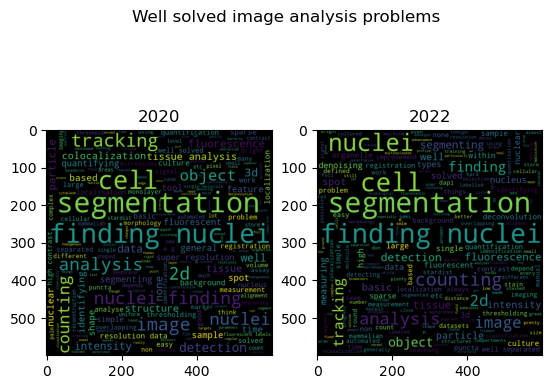

In [ ]:
#comparison of well solved image analysis problems - 2021 and 2022
plt.figure()
fig, ax = plt.subplots(1,2)
fig.suptitle('Well solved image analysis problems')

ax[0].imshow(well_solved_wc_2021)
ax[1].imshow(well_solved_wc)
ax[0].set_title('2020')
ax[1].set_title('2022')

synonyms- wordcloud 

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\3966255257.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



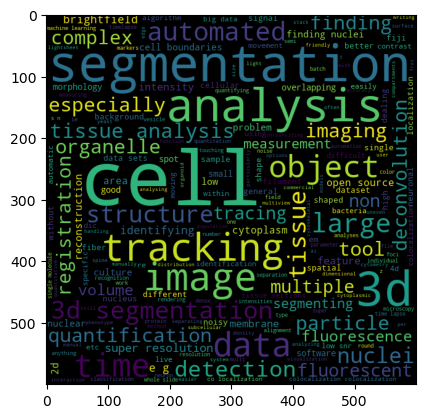

In [297]:
# wordcloud for image analysis problems which need better solutions -2021
better_sol_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_wish_had_easier_better_solutions.txt')
better_sol_2021 = better_sol_2021.rename(columns= {'0':'better_sol'})
better_sol_2021

#worlcloud
input_better_2021 = ''.join(better_sol_2021["better_sol"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
better_sol_2021_wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=5).generate(input_better_2021)
plt.imshow(better_sol_2021_wc)

Text(0.5, 1.0, '2022')

<Figure size 640x480 with 0 Axes>

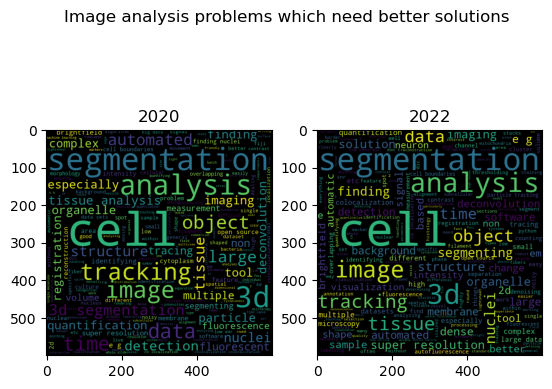

In [298]:
#comparison - image analysis problems which need better solutions - 2021 and 2022
plt.figure()
fig, ax = plt.subplots(1,2)
fig.suptitle('Image analysis problems which need better solutions')

ax[0].imshow(better_sol_2021_wc)
ax[1].imshow(well_solved_better)
ax[0].set_title('2020')
ax[1].set_title('2022')

synonyms - check 

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\3487428744.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



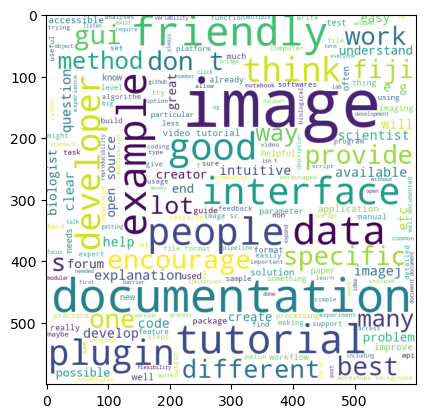

In [140]:
# wordcloud for creators role -2021
creator_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_do_you_think_analysis_tool_CREATORS_such_as_software_developers_could_should_do_to_make_image_analysis_better_and_more_successful_How_best_could_we_encourage_them_to_do_it.txt')
creator_2021 = creator_2021.rename(columns= {'0':'creator_role'})
creator_2021

input_creator_2021 = ''.join(creator_2021["creator_role"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
stopwords_new = ['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'need'] + list(STOPWORDS)
creator_2021 = WordCloud(stopwords=stopwords_new, background_color='white', width=600, height=600, random_state=1).generate(input_creator_2021)
plt.imshow(creator_2021)

Text(0.5, 1.0, '2022')

<Figure size 640x480 with 0 Axes>

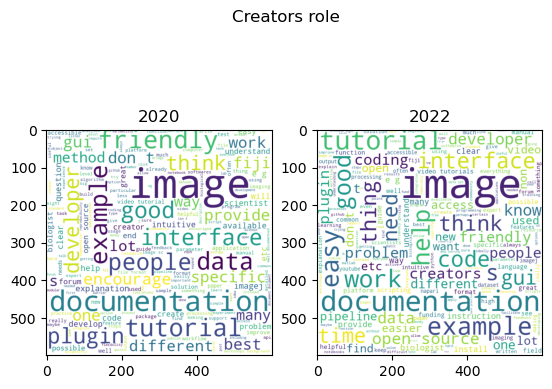

In [294]:
#comparison - Creators role - 2021 and 2022
plt.figure()
fig, ax = plt.subplots(1,2)
fig.suptitle('Creators role')

ax[0].imshow(creator_2021)
ax[1].imshow(well_solved_creator)
ax[0].set_title('2020')
ax[1].set_title('2022')

remove - make, use, better and other words did not add value 
words in the question to the stopwords list 


C:\Users\ssivagur\AppData\Local\Temp\ipykernel_31648\1930188721.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



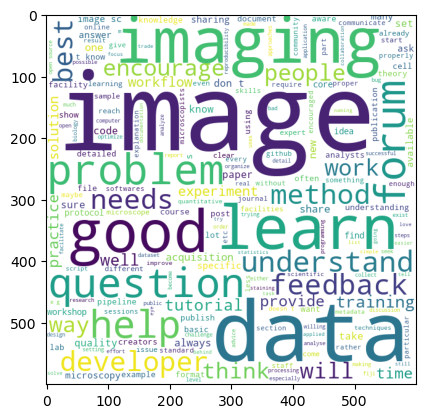

In [299]:
# wordcloud for users role -2020
user_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_do_you_think_analysis_tool_USERS_such_as_microscopists_could_should_do_to_make_image_analysis_better_and_more_successful__How_best_could_we_encourage_them_to_do_it.txt')
user_2021 = user_2021.rename(columns= {'0':'user_role'})
user_2021

input_user_2021 = ''.join(user_2021["user_role"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
stopwords_new = ['tool','make','analysis', 'better', 'more', 'software', 'tools', 'user', 'step', 'users', 'use', 'need'] + list(STOPWORDS)
user_2021 = WordCloud(stopwords=stopwords_new, background_color='white', width=600, height=600, random_state=1).generate(input_user_2021)
plt.imshow(user_2021)

Text(0.5, 1.0, '2022')

<Figure size 640x480 with 0 Axes>

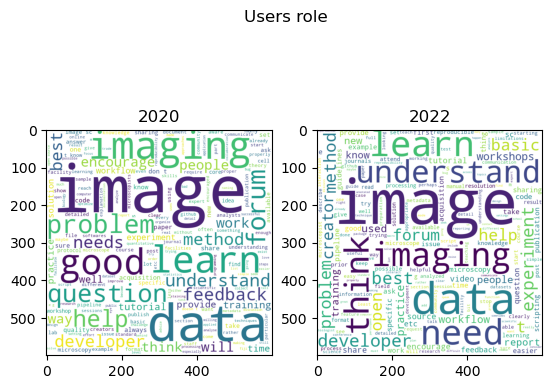

In [301]:
#comparison - Users role - 2020 and 2022
plt.figure()
fig, ax = plt.subplots(1,2)
fig.suptitle('Users role')

ax[0].imshow(user_2021)
ax[1].imshow(well_solved_user)
ax[0].set_title('2020')
ax[1].set_title('2022')

In [328]:
# Topics of interest for future tutorials - 2020 and 2022
top_20 = topic_data_2021_sum.to_frame()
top_20 = top_20.rename(columns={0:'counts'})
top_20 = top_20.reset_index()
top_20 = top_20.rename(columns={'index':'topics'})

top_22 = topic_data_sum.to_frame()
top_22 = top_22.rename(columns={0:'counts'})
top_22 = top_22.reset_index()
top_22 = top_22.rename(columns={'index':'topics'})


# bar chart
top_comp = go.Figure()

top_comp.add_trace(go.Bar(name='2020',x=top_20['topics'], y=top_20['counts'], text=top_20['counts']))
top_comp.add_trace(go.Bar(name='2022', x=top_22['topics'], y=top_22['counts'], text=top_22['counts']))

top_comp.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, font=dict(family='Helvetica', color="Black", size=16))
top_comp.update_xaxes(categoryorder='total descending')

In [345]:
#Conf-2020

conf_20 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\Please_select_any_of_the_following_you_have_attended_in_the_past.txt')
conf_20= conf_20.rename(columns={'0':'conf'})
conf_20
conf_20 = conf_20.dropna()
conf_20['Workshop'] = conf_20['conf'].apply(lambda x: True if 'Workshop' in x else False)
conf_20['Conference session'] = conf_20['conf'].apply(lambda x: True if 'session' in x else False)
conf_20['Conference'] = conf_20['conf'].apply(lambda x: True if 'dedicated' in x else False)



In [346]:
conf_20 = conf_20.iloc[:, 1:4]
conf_tot = conf_20.sum()
conf_tot = conf_tot.to_frame()

0
Workshop            370
Conference session  247
Conference          158

## 2022 - comparisons with comp skills and comfort in developing new comp skills 

In [ ]:
#Comparing the skills with interest for the topics of image analysis tutorials 
int_skills_df

Interes in topics Image analysis theory  \
0                       Somewhat interested   
1                       Somewhat interested   
2                       Somewhat interested   
3                     Moderately interested   
4                           Very interested   
..                                      ...   
489                   Moderately interested   
490                         Very interested   
491                         Very interested   
492                   Moderately interested   
493                     Somewhat interested   

    Interest in topics Image analysis practices  \
0                         Moderately interested   
1                               Very interested   
2                           Somewhat interested   
3                               Very interested   
4                         Moderately interested   
..                                          ...   
489                             Very interested   
490                             Very interested   
491                             Very interested   
492                       Moderately interested   
493                       Moderately interested   

    Interest in topics related to sub discipline  \
0                                Very interested   
1                          Moderately interested   
2                          Moderately interested   
3                                Very interested   
4                          Moderately interested   
..                                           ...   
489                              Very interested   
490                              Very interested   
491                              Very interested   
492                              Very interested   
493                              Very interested   

    Interest in topics Specific software tool  \
0                             Very interested   
1                         Somewhat interested   
2                       Moderately interested   
3                             Very interested   
4                       Not at all interested   
..                                        ...   
489                     Moderately interested   
490                           Very interested   
491                       Somewhat interested   
492                           Very interested   
493                     Moderately interested   

    Interest in topics Deep learning for image analysis  \
0                                  Somewhat interested    
1                                      Very interested    
2                                Moderately interested    
3                                Moderately interested    
4                                Not at all interested    
..                                                 ...    
489                              Moderately interested    
490                                    Very interested    
491                                    Very interested    
492                                    Very interested    
493                                Somewhat interested    

    Interest in topics Analyzing large images  \
0                       Not at all interested   
1                       Moderately interested   
2                       Moderately interested   
3                         Somewhat interested   
4                       Moderately interested   
..                                        ...   
489                     Moderately interested   
490                           Very interested   
491                           Very interested   
492                           Very interested   
493                       Somewhat interested   

    Interest in topics Visualization of results  \
0                           Somewhat interested   
1                           Somewhat interested   
2                         Moderately interested   
3                         Moderately interested   
4                         Moderately interested   
..      

In [ ]:
##categories -theory 
df_theory = int_skills_df.loc[:, ["Interes in topics Image analysis theory", "Knowledge of computational skills"]]

df_the_grp = df_theory.groupby('Knowledge of computational skills')
#High skilled- theory
df_the_high = df_the_grp.get_group('High skill')
df_the_high = df_the_high['Interes in topics Image analysis theory'].value_counts().to_frame().reset_index()
df_the_high['per_high'] =(df_the_high['Interes in topics Image analysis theory']/df_the_high['Interes in topics Image analysis theory'].sum())*100
df_the_high['per_high'] = df_the_high['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med = df_the_grp.get_group('Medium skill')
df_the_med = df_the_med['Interes in topics Image analysis theory'].value_counts().to_frame().reset_index()
df_the_med['per_med'] =(df_the_med['Interes in topics Image analysis theory']/df_the_med['Interes in topics Image analysis theory'].sum())*100
df_the_med['per_med'] = df_the_med['per_med'].round(decimals=1)

#low skill -theory 
df_the_low = df_the_grp.get_group('Low skill')
df_the_low = df_the_low['Interes in topics Image analysis theory'].value_counts().to_frame().reset_index()
df_the_low['per_low'] =(df_the_low['Interes in topics Image analysis theory']/df_the_low['Interes in topics Image analysis theory'].sum())*100
df_the_low['per_low'] = df_the_low['per_low'].round(decimals=1)


In [ ]:
##categories - practices
df_practices = int_skills_df.loc[:, ["Interest in topics Image analysis practices", "Knowledge of computational skills"]]

df_the_grp_1 = df_practices.groupby('Knowledge of computational skills')
#High skilled- practices
df_the_high_p = df_the_grp_1.get_group('High skill')
df_the_high_p = df_the_high_p['Interest in topics Image analysis practices'].value_counts().to_frame().reset_index()
df_the_high_p['per_high'] =(df_the_high_p['Interest in topics Image analysis practices']/df_the_high_p['Interest in topics Image analysis practices'].sum())*100
df_the_high_p['per_high'] = df_the_high_p['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_p = df_the_grp_1.get_group('Medium skill')
df_the_med_p = df_the_med_p['Interest in topics Image analysis practices'].value_counts().to_frame().reset_index()
df_the_med_p['per_med'] =(df_the_med_p['Interest in topics Image analysis practices']/df_the_med_p['Interest in topics Image analysis practices'].sum())*100
df_the_med_p['per_med'] = df_the_med_p['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_p = df_the_grp_1.get_group('Low skill')
df_the_low_p = df_the_low_p['Interest in topics Image analysis practices'].value_counts().to_frame().reset_index()
df_the_low_p['per_low'] =(df_the_low_p['Interest in topics Image analysis practices']/df_the_low_p['Interest in topics Image analysis practices'].sum())*100
df_the_low_p['per_low'] = df_the_low_p['per_low'].round(decimals=1)

In [ ]:
#categories - particular field
df_sub = int_skills_df.loc[:, ["Interest in topics related to sub discipline", "Knowledge of computational skills"]]

df_the_grp_sub = df_sub.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_sub = df_the_grp_sub.get_group('High skill')
df_the_high_sub = df_the_high_sub['Interest in topics related to sub discipline'].value_counts().to_frame().reset_index()
df_the_high_sub['per_high'] =(df_the_high_sub['Interest in topics related to sub discipline']/df_the_high_sub['Interest in topics related to sub discipline'].sum())*100
df_the_high_sub['per_high'] = df_the_high_sub['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_sub = df_the_grp_sub.get_group('Medium skill')
df_the_med_sub = df_the_med_sub['Interest in topics related to sub discipline'].value_counts().to_frame().reset_index()
df_the_med_sub['per_med'] =(df_the_med_sub['Interest in topics related to sub discipline']/df_the_med_sub['Interest in topics related to sub discipline'].sum())*100
df_the_med_sub['per_med'] = df_the_med_sub['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_sub = df_the_grp_sub.get_group('Low skill')
df_the_low_sub = df_the_low_sub['Interest in topics related to sub discipline'].value_counts().to_frame().reset_index()
df_the_low_sub['per_low'] =(df_the_low_sub['Interest in topics related to sub discipline']/df_the_low_sub['Interest in topics related to sub discipline'].sum())*100
df_the_low_sub['per_low'] = df_the_low_sub['per_low'].round(decimals=1)

In [ ]:
#categories - spc tool
df_tool = int_skills_df.loc[:, ["Interest in topics Specific software tool", "Knowledge of computational skills"]]

df_the_grp_tool = df_tool.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_tool = df_the_grp_tool.get_group('High skill')
df_the_high_tool = df_the_high_tool['Interest in topics Specific software tool'].value_counts().to_frame().reset_index()
df_the_high_tool['per_high'] =(df_the_high_tool['Interest in topics Specific software tool']/df_the_high_tool['Interest in topics Specific software tool'].sum())*100
df_the_high_tool['per_high'] = df_the_high_tool['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_tool = df_the_grp_tool.get_group('Medium skill')
df_the_med_tool = df_the_med_tool['Interest in topics Specific software tool'].value_counts().to_frame().reset_index()
df_the_med_tool['per_med'] =(df_the_med_tool['Interest in topics Specific software tool']/df_the_med_tool['Interest in topics Specific software tool'].sum())*100
df_the_med_tool['per_med'] = df_the_med_tool['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_tool = df_the_grp_tool.get_group('Low skill')
df_the_low_tool = df_the_low_tool['Interest in topics Specific software tool'].value_counts().to_frame().reset_index()
df_the_low_tool['per_low'] =(df_the_low_tool['Interest in topics Specific software tool']/df_the_low_tool['Interest in topics Specific software tool'].sum())*100
df_the_low_tool['per_low'] = df_the_low_tool['per_low'].round(decimals=1)

In [ ]:
#categories - DL
df_DL = int_skills_df.loc[:, ["Interest in topics Deep learning for image analysis", "Knowledge of computational skills"]]

df_the_grp_DL = df_DL.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_DL = df_the_grp_DL.get_group('High skill')
df_the_high_DL = df_the_high_DL['Interest in topics Deep learning for image analysis'].value_counts().to_frame().reset_index()
df_the_high_DL['per_high'] =(df_the_high_DL['Interest in topics Deep learning for image analysis']/df_the_high_DL['Interest in topics Deep learning for image analysis'].sum())*100
df_the_high_DL['per_high'] = df_the_high_DL['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_DL = df_the_grp_DL.get_group('Medium skill')
df_the_med_DL = df_the_med_DL['Interest in topics Deep learning for image analysis'].value_counts().to_frame().reset_index()
df_the_med_DL['per_med'] =(df_the_med_DL['Interest in topics Deep learning for image analysis']/df_the_med_DL['Interest in topics Deep learning for image analysis'].sum())*100
df_the_med_DL['per_med'] = df_the_med_DL['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_DL = df_the_grp_DL.get_group('Low skill')
df_the_low_DL = df_the_low_DL['Interest in topics Deep learning for image analysis'].value_counts().to_frame().reset_index()
df_the_low_DL['per_low'] =(df_the_low_DL['Interest in topics Deep learning for image analysis']/df_the_low_DL['Interest in topics Deep learning for image analysis'].sum())*100
df_the_low_DL['per_low'] = df_the_low_DL['per_low'].round(decimals=1)

In [ ]:
#categories - large images
df_large = int_skills_df.loc[:, ["Interest in topics Analyzing large images", "Knowledge of computational skills"]]

df_the_grp_large = df_large.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_large = df_the_grp_large.get_group('High skill')
df_the_high_large = df_the_high_large['Interest in topics Analyzing large images'].value_counts().to_frame().reset_index()
df_the_high_large['per_high'] =(df_the_high_large['Interest in topics Analyzing large images']/df_the_high_large['Interest in topics Analyzing large images'].sum())*100
df_the_high_large['per_high'] = df_the_high_large['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_large = df_the_grp_large.get_group('Medium skill')
df_the_med_large = df_the_med_large['Interest in topics Analyzing large images'].value_counts().to_frame().reset_index()
df_the_med_large['per_med'] =(df_the_med_large['Interest in topics Analyzing large images']/df_the_med_large['Interest in topics Analyzing large images'].sum())*100
df_the_med_large['per_med'] = df_the_med_large['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_large = df_the_grp_large.get_group('Low skill')
df_the_low_large = df_the_low_large['Interest in topics Analyzing large images'].value_counts().to_frame().reset_index()
df_the_low_large['per_low'] =(df_the_low_large['Interest in topics Analyzing large images']/df_the_low_large['Interest in topics Analyzing large images'].sum())*100
df_the_low_large['per_low'] = df_the_low_large['per_low'].round(decimals=1)

In [ ]:
#categories - Visualization of results
df_viz = int_skills_df.loc[:, ["Interest in topics Visualization of results", "Knowledge of computational skills"]]

df_the_grp_viz = df_viz.groupby('Knowledge of computational skills')

#High skilled- practices
df_the_high_viz = df_the_grp_viz.get_group('High skill')
df_the_high_viz = df_the_high_viz['Interest in topics Visualization of results'].value_counts().to_frame().reset_index()
df_the_high_viz['per_high'] =(df_the_high_viz['Interest in topics Visualization of results']/df_the_high_viz['Interest in topics Visualization of results'].sum())*100
df_the_high_viz['per_high'] = df_the_high_viz['per_high'].round(decimals=1)

#Medium skill - theory 
df_the_med_viz = df_the_grp_viz.get_group('Medium skill')
df_the_med_viz = df_the_med_viz['Interest in topics Visualization of results'].value_counts().to_frame().reset_index()
df_the_med_viz['per_med'] =(df_the_med_viz['Interest in topics Visualization of results']/df_the_med_viz['Interest in topics Visualization of results'].sum())*100
df_the_med_viz['per_med'] = df_the_med_viz['per_med'].round(decimals=1)

#low skill -theory 
df_the_low_viz = df_the_grp_viz.get_group('Low skill')
df_the_low_viz = df_the_low_viz['Interest in topics Visualization of results'].value_counts().to_frame().reset_index()
df_the_low_viz['per_low'] =(df_the_low_viz['Interest in topics Visualization of results']/df_the_low_viz['Interest in topics Visualization of results'].sum())*100
df_the_low_viz['per_low'] = df_the_low_viz['per_low'].round(decimals=1)

In [ ]:
#Topics for interest for the tutorials based on skills 
int_ski = go.Figure()

int_ski = make_subplots(rows=3, cols=3,shared_yaxes='all', y_title='Percent', subplot_titles=('Image analysis theory', 'Image analysis practices', 'Image analysis practices <br> related to particular field', 'Specific software tool', 'Deep learning for image analysis', 'Analyzing large images', 'Visualization of results'))


int_ski.add_trace(go.Bar(name="High skill", x=df_the_high['index'], y=df_the_high['per_high'], text=df_the_high['per_high'],marker_color= 'cornflowerblue', legendgroup='group1', yaxis='y1'), row=1, col=1)
int_ski.add_trace(go.Bar(name="Medium skill", x=df_the_med['index'], y=df_the_med['per_med'], text=df_the_med['per_med'],marker_color= 'deepskyblue', legendgroup='group1'), row=1, col=1)
int_ski.add_trace(go.Bar(name="Medium skill", x=df_the_low['index'], y=df_the_low['per_low'], text=df_the_low['per_low'],marker_color= 'lightskyblue', legendgroup='group1'), row=1, col=1)

int_ski.add_trace(go.Bar(x=df_the_high_p['index'], y=df_the_high_p['per_high'], text=df_the_high_p['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1'), row=1, col=2)
int_ski.add_trace(go.Bar(x=df_the_med_p['index'], y=df_the_med_p['per_med'], text=df_the_med_p['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'), row=1, col=2)
int_ski.add_trace(go.Bar(x=df_the_low_p['index'], y=df_the_low_p['per_low'], text=df_the_low_p['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'), row=1, col=2)

int_ski.add_trace(go.Bar(x=df_the_high_sub['index'], y=df_the_high_sub['per_high'], text=df_the_high_sub['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1'), row=1, col=3)
int_ski.add_trace(go.Bar(x=df_the_med_sub['index'], y=df_the_med_sub['per_med'], text=df_the_med_sub['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'), row=1, col=3)
int_ski.add_trace(go.Bar(x=df_the_low_sub['index'], y=df_the_low_sub['per_low'], text=df_the_low_sub['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'), row=1, col=3)

int_ski.add_trace(go.Bar(x=df_the_high_tool['index'], y=df_the_high_tool['per_high'], text=df_the_high_tool['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1'), row=2, col=1)
int_ski.add_trace(go.Bar(x=df_the_med_tool['index'], y=df_the_med_tool['per_med'], text=df_the_med_tool['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'), 2,1)
int_ski.add_trace(go.Bar(x=df_the_low_tool['index'], y=df_the_low_tool['per_low'], text=df_the_low_tool['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'), 2,1)

int_ski.add_trace(go.Bar(x=df_the_high_DL['index'], y=df_the_high_DL['per_high'], text=df_the_high_DL['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1'), row=2, col=2)
int_ski.add_trace(go.Bar(x=df_the_med_DL['index'], y=df_the_med_DL['per_med'], text=df_the_med_DL['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'), 2,2)
int_ski.add_trace(go.Bar(x=df_the_low_DL['index'], y=df_the_low_DL['per_low'], text=df_the_low_DL['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'), 2,2)

int_ski.add_trace(go.Bar(x=df_the_high_large['index'], y=df_the_high_large['per_high'], text=df_the_high_large['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1'), row=2, col=3)
int_ski.add_trace(go.Bar(x=df_the_med_large['index'], y=df_the_med_large['per_med'], text=df_the_med_large['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'), 2,3)
int_ski.add_trace(go.Bar(x=df_the_low_large['index'], y=df_the_low_large['per_low'], text=df_the_low_large['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'), 2,3)

int_ski.add_trace(go.Bar(x=df_the_high_viz['index'], y=df_the_high_viz['per_high'], text=df_the_high_viz['per_high'],marker_color= 'cornflowerblue',showlegend=False, legendgroup='group1',yaxis='y7'), row=3, col=1)
int_ski.add_trace(go.Bar(x=df_the_med_viz['index'], y=df_the_med_viz['per_med'], text=df_the_med_viz['per_med'],marker_color= 'deepskyblue',showlegend=False, legendgroup='group1'),3,1)
int_ski.add_trace(go.Bar(x=df_the_low_viz['index'], y=df_the_low_viz['per_low'], text=df_the_low_viz['per_low'],marker_color= 'lightskyblue',showlegend=False, legendgroup='group1'),3,1)

int_ski.update_layout(width=1000, height=1000, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
int_ski.update_layout(yaxis=dict(title='Percent'),yaxis7=dict(title="Percent"))
int_ski.update_layout(title='Topics of interest for the future workshops', title_x =0.5, title_y =0.99)

In [ ]:
#Creating dataframes for preferable instructional methods vs comp skills 
dct ={}
for i in range(10,17):
    df_i= data.iloc[:,[i, 77]]
    df_group_i = df_i.groupby('Knowledge of computational skills')
    df_i_high = df_group_i.get_group('High skill')
    df_i_high = df_i_high.value_counts().to_frame().reset_index()
    df_i_high['per_high'] = (df_i_high[0]/df_i_high[0].sum())*100
    df_i_high['per_high'] = df_i_high['per_high'].round(decimals=1)
       
    df_i_med = df_group_i.get_group('Medium skill')
    df_i_med = df_i_med.value_counts().to_frame().reset_index()
    df_i_med['per_med'] = (df_i_med[0]/df_i_med[0].sum())*100
    df_i_med['per_med'] = df_i_med['per_med'].round(decimals=1)
    
    df_i_low = df_group_i.get_group('Low skill')
    df_i_low = df_i_low.value_counts().to_frame().reset_index()
    df_i_low['per_low'] = (df_i_low[0]/df_i_low[0].sum())*100
    df_i_low['per_low'] = df_i_low['per_low'].round(decimals=1)
    
    columnnames = list(df_i.columns)
    df_name = columnnames[0]
    namelist = df_name.split()
    dfnamehigh = 'High' + str(namelist[-1])
    dfnamemed = 'Med' + str(namelist[-1])
    dfnamelow = 'Low' + str(namelist[-1])
    dct[dfnamehigh] = df_i_high
    dct[dfnamemed] = df_i_med
    dct[dfnamelow] = df_i_low
   



In [ ]:
#chart - preferable instructional methods vs comp skill 

ins_skill = go.Figure()
ins_skill = make_subplots(rows=3, cols=3,shared_yaxes='all', y_title='Percent', subplot_titles=('Best practices articles', 'Written tutorials', 'Video tutorial', 'Interactive webinar','Office hours','In-person workshop <br> /One day workshop', 'Multi-day workshop'))

ins_skill.add_trace(go.Bar(name='High skill', x=dct['Higharticles']['Preferable instructional methods articles'], y=dct['Higharticles']['per_high'],text=dct['Higharticles']['per_high'], marker_color ='darkgreen', yaxis='y1'),1,1)
ins_skill.add_trace(go.Bar(name='Medium skill', x=dct['Medarticles']['Preferable instructional methods articles'], y=dct['Medarticles']['per_med'],text=dct['Medarticles']['per_med'], marker_color = 'green'),1,1)
ins_skill.add_trace(go.Bar(name='Low skill', x=dct['Lowarticles']['Preferable instructional methods articles'], y=dct['Lowarticles']['per_low'],text=dct['Lowarticles']['per_low'], marker_color = 'lightgreen'),1,1)

ins_skill.add_trace(go.Bar(x=dct['Hightutorials']['Preferable instructional methods written tutorials'], y=dct['Hightutorials']['per_high'],text=dct['Hightutorials']['per_high'], marker_color ='darkgreen',showlegend =False),1,2)
ins_skill.add_trace(go.Bar(x=dct['Medtutorials']['Preferable instructional methods written tutorials'], y=dct['Medtutorials']['per_med'],text=dct['Medtutorials']['per_med'], marker_color = 'green', showlegend =False),1,2)
ins_skill.add_trace(go.Bar(x=dct['Lowtutorials']['Preferable instructional methods written tutorials'], y=dct['Lowtutorials']['per_low'],text=dct['Lowtutorials']['per_low'], marker_color = 'lightgreen', showlegend =False),1,2)

ins_skill.add_trace(go.Bar(x=dct['Hightutorial']['Preferable instructional methods Video tutorial'], y=dct['Hightutorial']['per_high'],text=dct['Hightutorial']['per_high'], marker_color ='darkgreen',showlegend =False),1,3)
ins_skill.add_trace(go.Bar(x=dct['Medtutorial']['Preferable instructional methods Video tutorial'], y=dct['Medtutorial']['per_med'],text=dct['Medtutorial']['per_med'], marker_color = 'green', showlegend =False),1,3)
ins_skill.add_trace(go.Bar(x=dct['Lowtutorial']['Preferable instructional methods Video tutorial'], y=dct['Lowtutorial']['per_low'],text=dct['Lowtutorial']['per_low'], marker_color = 'lightgreen', showlegend =False),1,3)

ins_skill.add_trace(go.Bar(x=dct['Highwebinar']['Preferable instructional methods Interactive webinar'], y=dct['Highwebinar']['per_high'],text=dct['Highwebinar']['per_high'], marker_color ='darkgreen',showlegend =False),2,1)
ins_skill.add_trace(go.Bar(x=dct['Medwebinar']['Preferable instructional methods Interactive webinar'], y=dct['Medwebinar']['per_med'],text=dct['Medwebinar']['per_med'], marker_color = 'green', showlegend =False),2,1)
ins_skill.add_trace(go.Bar(x=dct['Lowwebinar']['Preferable instructional methods Interactive webinar'], y=dct['Lowwebinar']['per_low'],text=dct['Lowwebinar']['per_low'], marker_color = 'lightgreen', showlegend =False),2,1)

ins_skill.add_trace(go.Bar(x=dct['Highhours']['Preferable instructional methods Office hours'], y=dct['Highhours']['per_high'],text=dct['Highhours']['per_high'], marker_color ='darkgreen',showlegend =False),2,2)
ins_skill.add_trace(go.Bar(x=dct['Medhours']['Preferable instructional methods Office hours'], y=dct['Medhours']['per_med'],text=dct['Medhours']['per_med'], marker_color = 'green', showlegend =False),2,2)
ins_skill.add_trace(go.Bar(x=dct['Lowhours']['Preferable instructional methods Office hours'], y=dct['Lowhours']['per_low'],text=dct['Lowhours']['per_low'], marker_color = 'lightgreen', showlegend =False),2,2)

ins_skill.add_trace(go.Bar(x=dct['High1day']['Preferable instructional methods Seminar 1day'], y=dct['High1day']['per_high'],text=dct['High1day']['per_high'], marker_color ='darkgreen',showlegend =False),2,3)
ins_skill.add_trace(go.Bar(x=dct['Med1day']['Preferable instructional methods Seminar 1day'], y=dct['Med1day']['per_med'],text=dct['Med1day']['per_med'], marker_color = 'green', showlegend =False),2,3)
ins_skill.add_trace(go.Bar(x=dct['Low1day']['Preferable instructional methods Seminar 1day'], y=dct['Low1day']['per_low'],text=dct['Low1day']['per_low'], marker_color = 'lightgreen', showlegend =False),2,3)

ins_skill.add_trace(go.Bar(x=dct['Highworkshop']['Preferable instructional methods Multiday workshop'], y=dct['Highworkshop']['per_high'],text=dct['Highworkshop']['per_high'], marker_color ='darkgreen',showlegend =False, yaxis='y7'),3,1)
ins_skill.add_trace(go.Bar(x=dct['Medworkshop']['Preferable instructional methods Multiday workshop'], y=dct['Medworkshop']['per_med'],text=dct['Medworkshop']['per_med'], marker_color = 'green', showlegend =False),3,1)
ins_skill.add_trace(go.Bar(x=dct['Lowworkshop']['Preferable instructional methods Multiday workshop'], y=dct['Lowworkshop']['per_low'],text=dct['Lowworkshop']['per_low'], marker_color = 'lightgreen', showlegend =False),3,1)


ins_skill.update_layout(width=1000, height=1000, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
ins_skill.update_layout(yaxis=dict(title='Percent'),yaxis7=dict(title='Percent'))
ins_skill.update_layout(title='Preferable instructional methods', title_x =0.5)
ins_skill.update_xaxes(categoryorder='array', categoryarray = ['Very preferable', 'Moderately preferable' , 'Somewhat preferable', 'Not at all preferable'] )

In [ ]:
#Creating dataframes for preferable instructional methods vs comfort in developing new comp skills 
dct_com ={}
for i in range(10,17):
    df_i= data.iloc[:,[i, 78]]
    df_group_i = df_i.groupby('Comfort')
    df_i_high = df_group_i.get_group('High comfort')
    df_i_high = df_i_high.value_counts().to_frame().reset_index()
    df_i_high['per_high'] = (df_i_high[0]/df_i_high[0].sum())*100
    df_i_high['per_high'] = df_i_high['per_high'].round(decimals=1)
       
    df_i_med = df_group_i.get_group('Medium comfort')
    df_i_med = df_i_med.value_counts().to_frame().reset_index()
    df_i_med['per_med'] = (df_i_med[0]/df_i_med[0].sum())*100
    df_i_med['per_med'] = df_i_med['per_med'].round(decimals=1)
    
    df_i_low = df_group_i.get_group('Low comfort')
    df_i_low = df_i_low.value_counts().to_frame().reset_index()
    df_i_low['per_low'] = (df_i_low[0]/df_i_low[0].sum())*100
    df_i_low['per_low'] = df_i_low['per_low'].round(decimals=1)
    
    columnnames = list(df_i.columns)
    df_name = columnnames[0]
    namelist = df_name.split()
    dfnamehigh = 'High' + str(namelist[-1])
    dfnamemed = 'Med' + str(namelist[-1])
    dfnamelow = 'Low' + str(namelist[-1])
    dct_com[dfnamehigh] = df_i_high
    dct_com[dfnamemed] = df_i_med
    dct_com[dfnamelow] = df_i_low

In [ ]:
#chart - preferable instructional methods vs comfort in developing new comp skills

ins_com = go.Figure()
ins_com = make_subplots(rows=3, cols=3,shared_yaxes="all",y_title='Percent', subplot_titles=('Best practices articles', 'Written tutorials', 'Video tutorial', 'Interactive webinar','Office hours','In-person workshop <br> /One day workshop', 'Multi-day workshop'))

ins_com.add_trace(go.Bar(name='High comfort', x=dct_com['Higharticles']['Preferable instructional methods articles'], y=dct_com['Higharticles']['per_high'],text=dct_com['Higharticles']['per_high'], marker_color ='darkviolet', yaxis='y1'),1,1)
ins_com.add_trace(go.Bar(name='Medium comfort', x=dct_com['Medarticles']['Preferable instructional methods articles'], y=dct_com['Medarticles']['per_med'],text=dct_com['Medarticles']['per_med'], marker_color = 'blueviolet'),1,1)
ins_com.add_trace(go.Bar(name='Low comfort', x=dct_com['Lowarticles']['Preferable instructional methods articles'], y=dct_com['Lowarticles']['per_low'],text=dct_com['Lowarticles']['per_low'], marker_color = 'violet'),1,1)

ins_com.add_trace(go.Bar(x=dct_com['Hightutorials']['Preferable instructional methods written tutorials'], y=dct_com['Hightutorials']['per_high'],text=dct_com['Hightutorials']['per_high'], marker_color ='darkviolet',showlegend =False),1,2)
ins_com.add_trace(go.Bar(x=dct_com['Medtutorials']['Preferable instructional methods written tutorials'], y=dct_com['Medtutorials']['per_med'],text=dct_com['Medtutorials']['per_med'], marker_color = 'blueviolet', showlegend =False),1,2)
ins_com.add_trace(go.Bar(x=dct_com['Lowtutorials']['Preferable instructional methods written tutorials'], y=dct_com['Lowtutorials']['per_low'],text=dct_com['Lowtutorials']['per_low'], marker_color = 'violet', showlegend =False),1,2)

ins_com.add_trace(go.Bar(x=dct_com['Hightutorial']['Preferable instructional methods Video tutorial'], y=dct_com['Hightutorial']['per_high'],text=dct_com['Hightutorial']['per_high'], marker_color ='darkviolet',showlegend =False),1,3)
ins_com.add_trace(go.Bar(x=dct_com['Medtutorial']['Preferable instructional methods Video tutorial'], y=dct_com['Medtutorial']['per_med'],text=dct_com['Medtutorial']['per_med'], marker_color = 'blueviolet', showlegend =False),1,3)
ins_com.add_trace(go.Bar(x=dct_com['Lowtutorial']['Preferable instructional methods Video tutorial'], y=dct_com['Lowtutorial']['per_low'],text=dct_com['Lowtutorial']['per_low'], marker_color = 'violet', showlegend =False),1,3)

ins_com.add_trace(go.Bar(x=dct_com['Highwebinar']['Preferable instructional methods Interactive webinar'], y=dct_com['Highwebinar']['per_high'],text=dct_com['Highwebinar']['per_high'], marker_color ='darkviolet',showlegend =False),2,1)
ins_com.add_trace(go.Bar(x=dct_com['Medwebinar']['Preferable instructional methods Interactive webinar'], y=dct_com['Medwebinar']['per_med'],text=dct_com['Medwebinar']['per_med'], marker_color = 'blueviolet', showlegend =False),2,1)
ins_com.add_trace(go.Bar(x=dct_com['Lowwebinar']['Preferable instructional methods Interactive webinar'], y=dct_com['Lowwebinar']['per_low'],text=dct_com['Lowwebinar']['per_low'], marker_color = 'violet', showlegend =False),2,1)

ins_com.add_trace(go.Bar(x=dct_com['Highhours']['Preferable instructional methods Office hours'], y=dct_com['Highhours']['per_high'],text=dct_com['Highhours']['per_high'], marker_color ='darkviolet',showlegend =False),2,2)
ins_com.add_trace(go.Bar(x=dct_com['Medhours']['Preferable instructional methods Office hours'], y=dct_com['Medhours']['per_med'],text=dct_com['Medhours']['per_med'], marker_color = 'blueviolet', showlegend =False),2,2)
ins_com.add_trace(go.Bar(x=dct_com['Lowhours']['Preferable instructional methods Office hours'], y=dct_com['Lowhours']['per_low'],text=dct_com['Lowhours']['per_low'], marker_color = 'violet', showlegend =False),2,2)

ins_com.add_trace(go.Bar(x=dct_com['High1day']['Preferable instructional methods Seminar 1day'], y=dct_com['High1day']['per_high'],text=dct_com['High1day']['per_high'], marker_color ='darkviolet',showlegend =False),2,3)
ins_com.add_trace(go.Bar(x=dct_com['Med1day']['Preferable instructional methods Seminar 1day'], y=dct_com['Med1day']['per_med'],text=dct_com['Med1day']['per_med'], marker_color = 'blueviolet', showlegend =False),2,3)
ins_com.add_trace(go.Bar(x=dct_com['Low1day']['Preferable instructional methods Seminar 1day'], y=dct_com['Low1day']['per_low'],text=dct_com['Low1day']['per_low'], marker_color = 'violet', showlegend =False),2,3)

ins_com.add_trace(go.Bar(x=dct_com['Highworkshop']['Preferable instructional methods Multiday workshop'], y=dct_com['Highworkshop']['per_high'],text=dct_com['Highworkshop']['per_high'], marker_color ='darkviolet',showlegend =False, yaxis='y7'),3,1)
ins_com.add_trace(go.Bar(x=dct_com['Medworkshop']['Preferable instructional methods Multiday workshop'], y=dct_com['Medworkshop']['per_med'],text=dct_com['Medworkshop']['per_med'], marker_color = 'blueviolet', showlegend =False),3,1)
ins_com.add_trace(go.Bar(x=dct_com['Lowworkshop']['Preferable instructional methods Multiday workshop'], y=dct_com['Lowworkshop']['per_low'],text=dct_com['Lowworkshop']['per_low'], marker_color = 'violet', showlegend =False),3,1)


ins_com.update_layout(width=1000, height=1000, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=14, color="Black")))
ins_com.update_layout(yaxis=dict(title='Percent'),yaxis7=dict(title='Percent'))
ins_com.update_layout(title='Preferable instructional methods', title_x =0.5)
ins_com.update_xaxes(categoryorder='array', categoryarray = ['Very preferable', 'Moderately preferable', 'Somewhat preferable', 'Not at all preferable'] )

In [ ]:
#Creating dataframes for preferable instructional methods vs worktype
mtd_work ={}
for i in range(10,17):
    df_i= data.iloc[:,[i, 76]]
    df_group_i = df_i.groupby('Work type')
    df_i_high = df_group_i.get_group('Imaging')
    df_i_high = df_i_high.value_counts().to_frame().reset_index()
    df_i_high['per_ima'] = (df_i_high[0]/df_i_high[0].sum())*100
    df_i_high['per_ima'] = df_i_high['per_ima'].round(decimals=1)
       
    df_i_med = df_group_i.get_group('Balanced')
    df_i_med = df_i_med.value_counts().to_frame().reset_index()
    df_i_med['per_bal'] = (df_i_med[0]/df_i_med[0].sum())*100
    df_i_med['per_bal'] = df_i_med['per_bal'].round(decimals=1)
    
    df_i_low = df_group_i.get_group('Analyst')
    df_i_low = df_i_low.value_counts().to_frame().reset_index()
    df_i_low['per_ana'] = (df_i_low[0]/df_i_low[0].sum())*100
    df_i_low['per_ana'] = df_i_low['per_ana'].round(decimals=1)
    
    columnnames = list(df_i.columns)
    df_name = columnnames[0]
    namelist = df_name.split()
    dfnamehigh = 'Imaging' + str(namelist[-1])
    dfnamemed = 'Balanced' + str(namelist[-1])
    dfnamelow = 'Analyst' + str(namelist[-1])
    mtd_work[dfnamehigh] = df_i_high
    mtd_work[dfnamemed] = df_i_med
    mtd_work[dfnamelow] = df_i_low

In [ ]:
mtd_work.keys()

dict_keys(['Imagingarticles', 'Balancedarticles', 'Analystarticles', 'Imagingtutorials', 'Balancedtutorials', 'Analysttutorials', 'Imagingtutorial', 'Balancedtutorial', 'Analysttutorial', 'Imagingwebinar', 'Balancedwebinar', 'Analystwebinar', 'Imaginghours', 'Balancedhours', 'Analysthours', 'Imaging1day', 'Balanced1day', 'Analyst1day', 'Imagingworkshop', 'Balancedworkshop', 'Analystworkshop'])

In [ ]:
#chart - preferable instructional methods vs work type

wrk_chart = go.Figure()
wrk_chart = make_subplots(rows=3, cols=3,y_title='Percent', subplot_titles=('Best practices articles', 'Written tutorials', 'Video tutorial', 'Interactive webinar','Office hours','In-person workshop <br> /One day workshop', 'Multi-day workshop'), shared_yaxes='all')

wrk_chart.add_trace(go.Bar(name='Imaging', x=mtd_work['Imagingarticles']['Preferable instructional methods articles'], y=mtd_work['Imagingarticles']['per_ima'],text=mtd_work['Imagingarticles']['per_ima'], marker_color ='royalblue', yaxis='y1'),1,1)
wrk_chart.add_trace(go.Bar(name='Balanced', x=mtd_work['Balancedarticles']['Preferable instructional methods articles'], y=mtd_work['Balancedarticles']['per_bal'],text=mtd_work['Balancedarticles']['per_bal'], marker_color = 'plum'),1,1)
wrk_chart.add_trace(go.Bar(name='Analyst', x=mtd_work['Analystarticles']['Preferable instructional methods articles'], y=mtd_work['Analystarticles']['per_ana'],text=mtd_work['Analystarticles']['per_ana'], marker_color = 'darkturquoise'),1,1)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imagingtutorials']['Preferable instructional methods written tutorials'], y=mtd_work['Imagingtutorials']['per_ima'],text=mtd_work['Imagingtutorials']['per_ima'], marker_color ='royalblue',showlegend =False),1,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedtutorials']['Preferable instructional methods written tutorials'], y=mtd_work['Balancedtutorials']['per_bal'],text=mtd_work['Balancedtutorials']['per_bal'], marker_color = 'plum', showlegend =False),1,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analysttutorials']['Preferable instructional methods written tutorials'], y=mtd_work['Analysttutorials']['per_ana'],text=mtd_work['Analysttutorials']['per_ana'], marker_color = 'darkturquoise', showlegend =False),1,2)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imagingtutorial']['Preferable instructional methods Video tutorial'], y=mtd_work['Imagingtutorial']['per_ima'],text=mtd_work['Imagingtutorial']['per_ima'], marker_color ='royalblue',showlegend =False),1,3)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedtutorial']['Preferable instructional methods Video tutorial'], y=mtd_work['Balancedtutorial']['per_bal'],text=mtd_work['Balancedtutorial']['per_bal'], marker_color = 'plum', showlegend =False),1,3)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analysttutorial']['Preferable instructional methods Video tutorial'], y=mtd_work['Analysttutorial']['per_ana'],text=mtd_work['Analysttutorial']['per_ana'], marker_color = 'darkturquoise', showlegend =False),1,3)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imagingwebinar']['Preferable instructional methods Interactive webinar'], y=mtd_work['Imagingwebinar']['per_ima'],text=mtd_work['Imagingwebinar']['per_ima'], marker_color ='royalblue',showlegend =False),2,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedwebinar']['Preferable instructional methods Interactive webinar'], y=mtd_work['Balancedwebinar']['per_bal'],text=mtd_work['Balancedwebinar']['per_bal'], marker_color = 'plum', showlegend =False),2,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analystwebinar']['Preferable instructional methods Interactive webinar'], y=mtd_work['Analystwebinar']['per_ana'],text=mtd_work['Analystwebinar']['per_ana'], marker_color = 'darkturquoise', showlegend =False),2,1)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imaginghours']['Preferable instructional methods Office hours'], y=mtd_work['Imaginghours']['per_ima'],text=mtd_work['Imaginghours']['per_ima'], marker_color ='royalblue',showlegend =False),2,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedhours']['Preferable instructional methods Office hours'], y=mtd_work['Balancedhours']['per_bal'],text=mtd_work['Balancedhours']['per_bal'], marker_color = 'plum', showlegend =False),2,2)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analysthours']['Preferable instructional methods Office hours'], y=mtd_work['Analysthours']['per_ana'],text=mtd_work['Analysthours']['per_ana'], marker_color = 'darkturquoise', showlegend =False),2,2)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imaging1day']['Preferable instructional methods Seminar 1day'], y=mtd_work['Imaging1day']['per_ima'],text=mtd_work['Imaging1day']['per_ima'], marker_color ='royalblue',showlegend =False),2,3)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balanced1day']['Preferable instructional methods Seminar 1day'], y=mtd_work['Balanced1day']['per_bal'],text=mtd_work['Balanced1day']['per_bal'], marker_color = 'plum', showlegend =False),2,3)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analyst1day']['Preferable instructional methods Seminar 1day'], y=mtd_work['Analyst1day']['per_ana'],text=mtd_work['Analyst1day']['per_ana'], marker_color = 'darkturquoise', showlegend =False),2,3)

wrk_chart.add_trace(go.Bar(x=mtd_work['Imagingworkshop']['Preferable instructional methods Multiday workshop'], y=mtd_work['Imagingworkshop']['per_ima'],text=mtd_work['Imagingworkshop']['per_ima'], marker_color ='royalblue',showlegend =False, yaxis='y7'),3,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Balancedworkshop']['Preferable instructional methods Multiday workshop'], y=mtd_work['Balancedworkshop']['per_bal'],text=mtd_work['Balancedworkshop']['per_bal'], marker_color = 'plum', showlegend =False),3,1)
wrk_chart.add_trace(go.Bar(x=mtd_work['Analystworkshop']['Preferable instructional methods Multiday workshop'], y=mtd_work['Analystworkshop']['per_ana'],text=mtd_work['Analystworkshop']['per_ana'], marker_color = 'darkturquoise', showlegend =False),3,1)


wrk_chart.update_layout(width=1000, height=1000, font=dict(family='Helvetica', color="Black", size=14), legend=dict(title_font_family = 'Helvetica', font=dict(size=14, color="Black")))
wrk_chart.update_layout(yaxis=dict(title='Percent'), yaxis7=dict(title='Percent'))
wrk_chart.update_layout(title='Preferable instructional methods', title_x =0.5)
wrk_chart.update_xaxes(categoryorder='array', categoryarray = ['Very preferable', 'Moderately preferable', 'Somewhat preferable', 'Not at all preferable'] )